In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Visualization of data

## Overview visualization

In [2]:
games = pd.read_pickle('datasets/cleaned_steam_games.pkl')
games.head()

name  all_reviews release_date  \
0                           DOOM           92   2016-05-12   
1  PLAYERUNKNOWN'S BATTLEGROUNDS           49   2017-12-21   
2                     BATTLETECH           71   2018-04-24   
3                           DayZ           61   2018-12-13   
4                     EVE Online           74   2003-05-06   

             developer            publisher  mature_content  original_price  \
0          id Software   Bethesda Softworks           False           19.99   
1     PUBG Corporation     PUBG Corporation            True           29.99   
2  Harebrained Schemes  Paradox Interactive           False           39.99   
3  Bohemia Interactive  Bohemia Interactive           False           44.99   
4                  CCP                  CCP           False            0.00   

   discount_price  popular_tags_1980s  popular_tags_1990's  ...  genre_Racing  \
0           14.99                   0                    0  ...             0   
1           29.99                   0                    0  ...             0   
2           39.99                   0                    0  ...             0   
3           44.99                   0                    0  ...             0   
4            0.00                   0                    0  ...             0   

   genre_Simulation  genre_Software Training  genre_Sports  genre_Strategy  \
0                 0                        0             0               0   
1                 0                        0             0               0   
2                 0                        0             0               1   
3                 0                        0             0               0   
4                 0                        0             0               1   

   genre_Utilities  genre_Valve  genre_Video Production  genre_Web Publishing  \
0                0            0                       0                     0   
1                0            0                       0                     0   
2                0            0                       0                     0   
3                0            0                       0                     0   
4                0            0                       0                     0   

   discount_percentage  
0            25.012506  
1             0.000000  
2             0.000000  
3             0.000000  
4             0.000000  

[5 rows x 444 columns]

In [3]:
print("Dimension of games: ", games.shape)

Dimension of games:  (12440, 444)


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12440 entries, 0 to 40811
Columns: 444 entries, name to discount_percentage
dtypes: Sparse[int32, 0](435), bool(1), datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 2.3+ MB


In [5]:
# List all the columns
list(games)

['name',
 'all_reviews',
 'release_date',
 'developer',
 'publisher',
 'mature_content',
 'original_price',
 'discount_price',
 'popular_tags_1980s',
 "popular_tags_1990's",
 'popular_tags_2.5D',
 'popular_tags_2D',
 'popular_tags_2D Fighter',
 'popular_tags_360 Video',
 'popular_tags_3D',
 'popular_tags_3D Platformer',
 'popular_tags_3D Vision',
 'popular_tags_4 Player Local',
 'popular_tags_4X',
 'popular_tags_6DOF',
 'popular_tags_ATV',
 'popular_tags_Abstract',
 'popular_tags_Action',
 'popular_tags_Action RPG',
 'popular_tags_Action-Adventure',
 'popular_tags_Addictive',
 'popular_tags_Adventure',
 'popular_tags_Agriculture',
 'popular_tags_Aliens',
 'popular_tags_Alternate History',
 'popular_tags_America',
 'popular_tags_Animation & Modeling',
 'popular_tags_Anime',
 'popular_tags_Arcade',
 'popular_tags_Arena Shooter',
 'popular_tags_Artificial Intelligence',
 'popular_tags_Assassin',
 'popular_tags_Asymmetric VR',
 'popular_tags_Asynchronous Multiplayer',
 'popular_tags_Atmosp

In [6]:
(games.dtypes).head(10)

name                             object
all_reviews                       int32
release_date             datetime64[ns]
developer                        object
publisher                        object
mature_content                     bool
original_price                  float64
discount_price                  float64
popular_tags_1980s     Sparse[int32, 0]
popular_tags_1990's    Sparse[int32, 0]
dtype: object

In [7]:
games['discount_percentage'] = (games['original_price'] - games['discount_price'])/games['original_price'] * 100
games['discount_percentage'] = games['discount_percentage'].fillna(0)

# Explore the data in the sequence of 

### All reviews

In [8]:
# Describe all reviews
games['all_reviews'].describe()

count    12440.000000
mean        73.785852
std         18.786190
min          0.000000
25%         63.000000
50%         78.000000
75%         88.000000
max        100.000000
Name: all_reviews, dtype: float64

<AxesSubplot:>

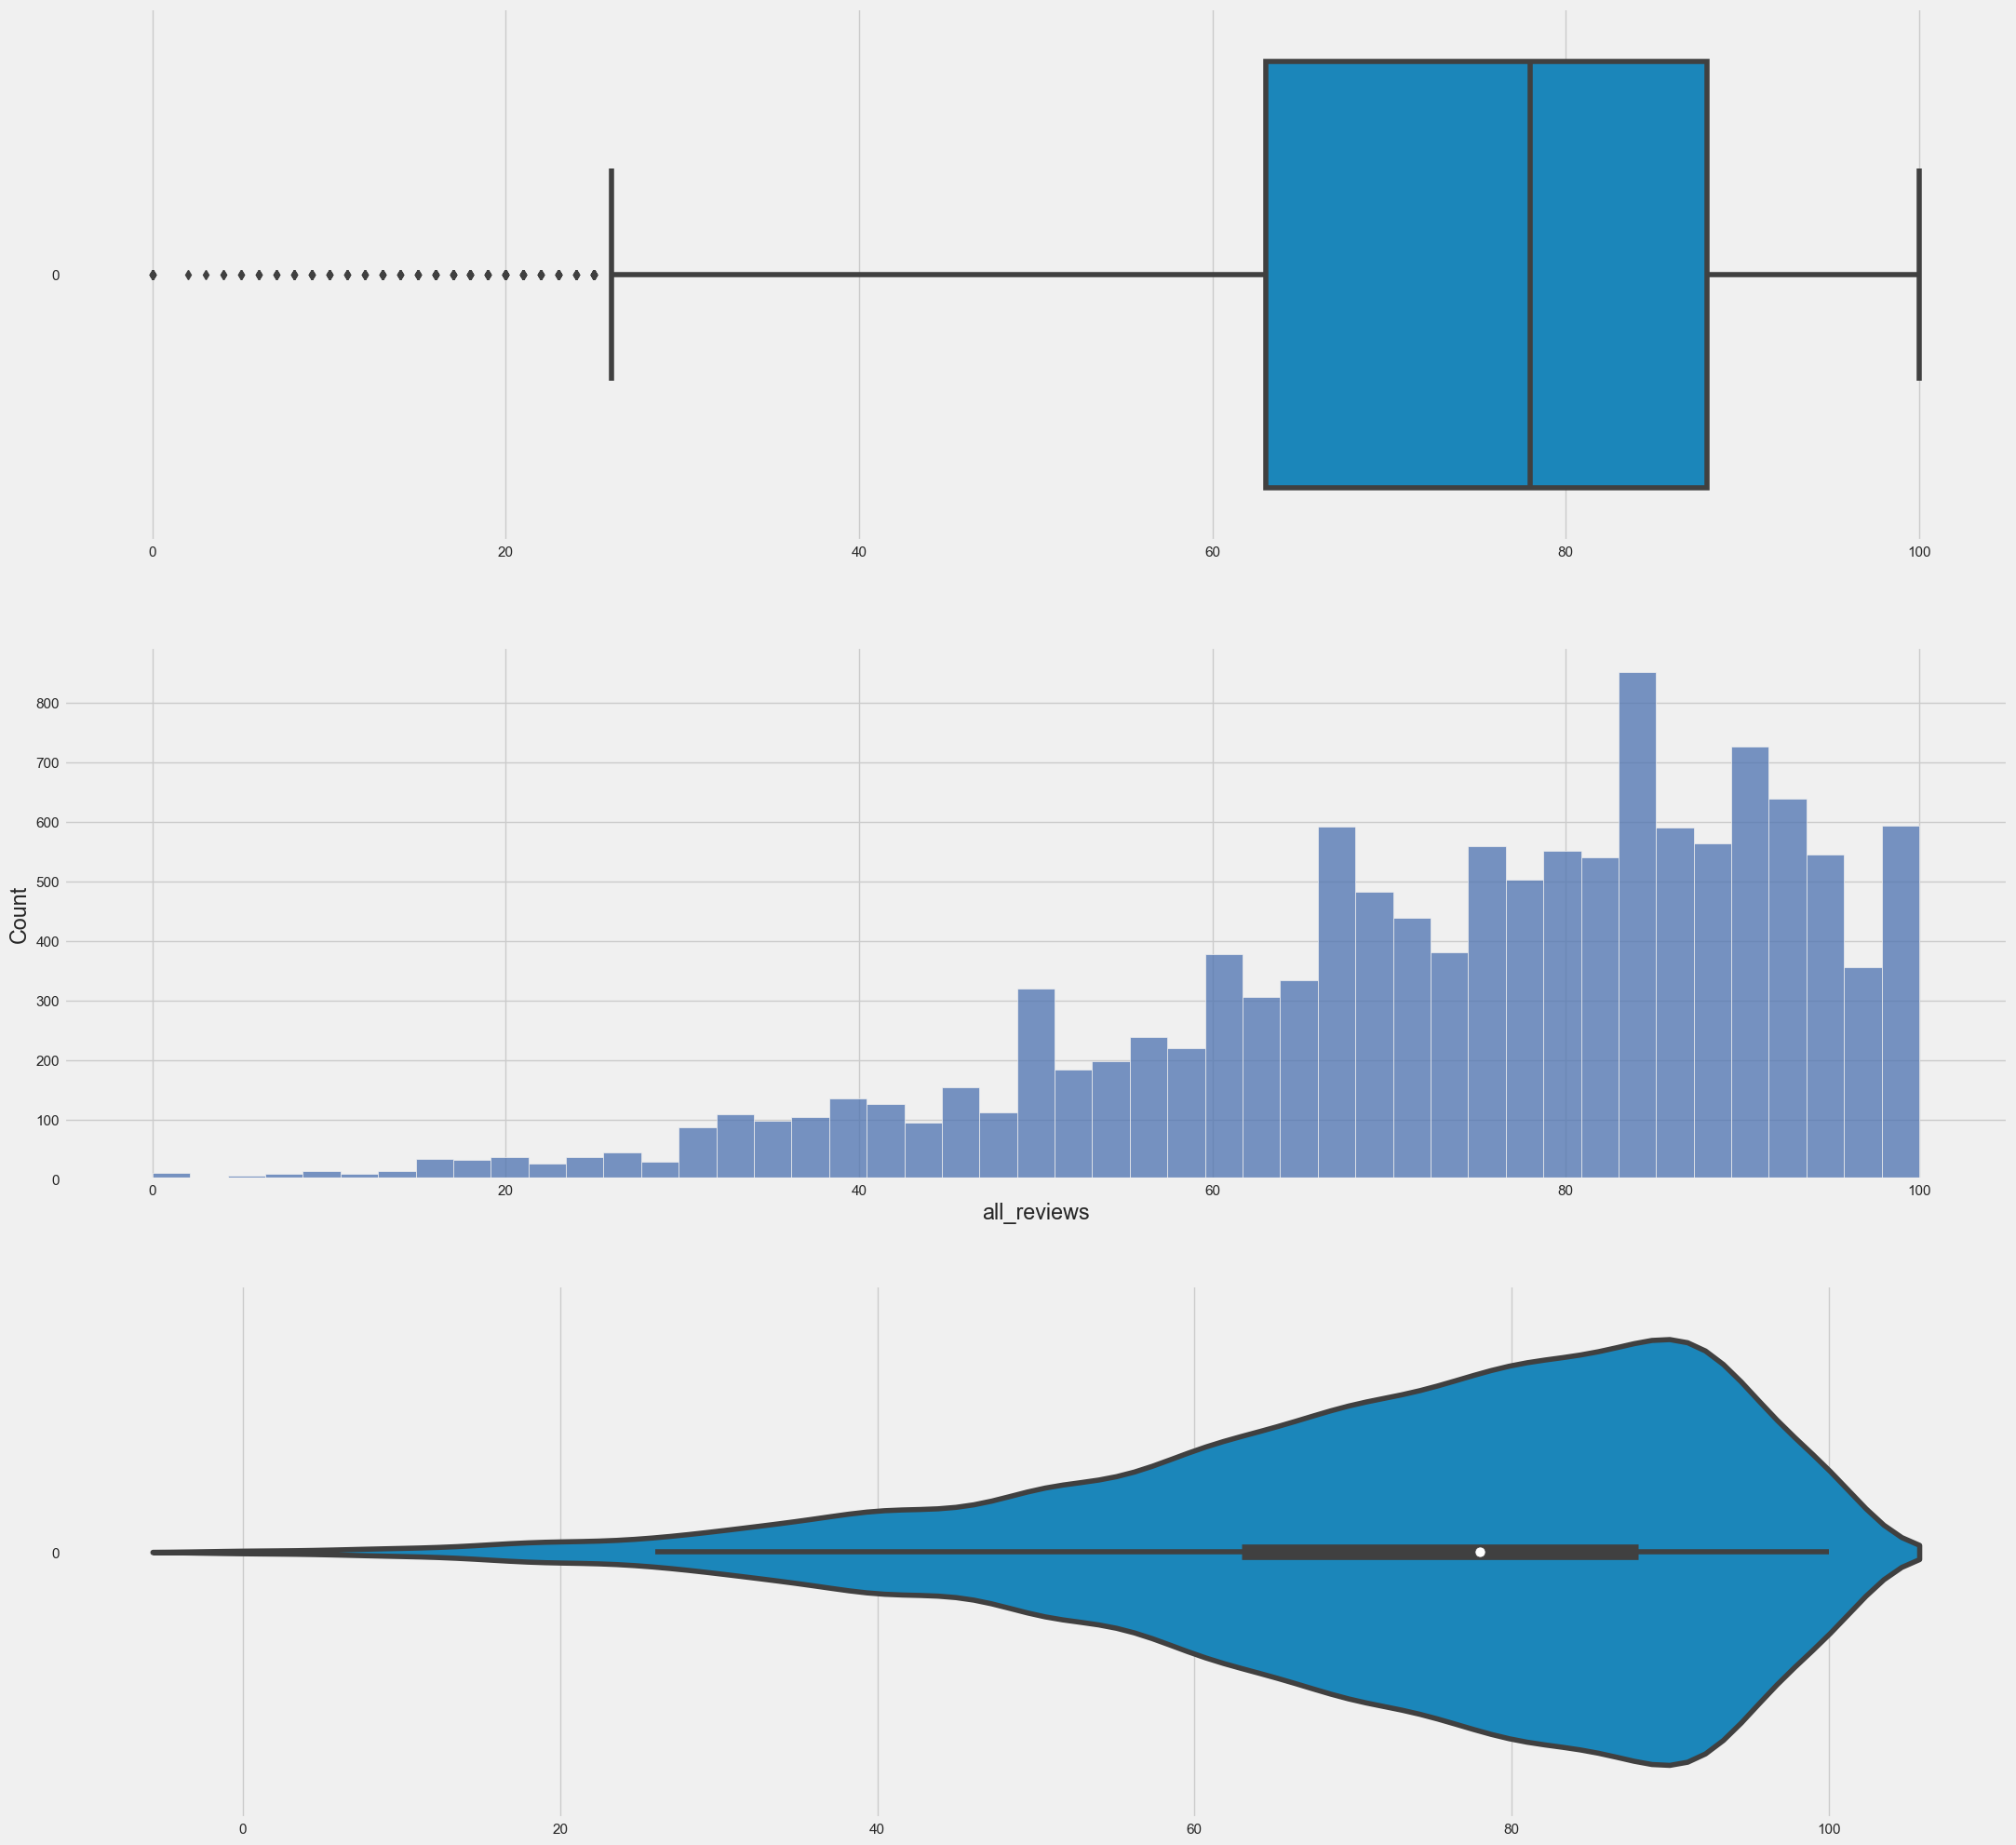

In [9]:
# Plots for all reviews
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = games['all_reviews'], orient = "h", ax = axes[0])
sb.histplot(data = games['all_reviews'],ax = axes[1])
sb.violinplot(data = games['all_reviews'], orient = "h", ax = axes[2])

### Pure Numerical data

In [10]:
# Add a column named discount percentage
games['discount_percentage'] = (games['original_price'] - games['discount_price'])/games['original_price'] * 100
games['discount_percentage'] = games['discount_percentage'].fillna(0)

# Numerical data
numericalgames = games[['all_reviews', 'original_price', 'discount_price', 'discount_percentage']]
numericalgames.head()

all_reviews  original_price  discount_price  discount_percentage
0           92           19.99           14.99            25.012506
1           49           29.99           29.99             0.000000
2           71           39.99           39.99             0.000000
3           61           44.99           44.99             0.000000
4           74            0.00            0.00             0.000000

Text(0.5, 0, 'discount_percentage')

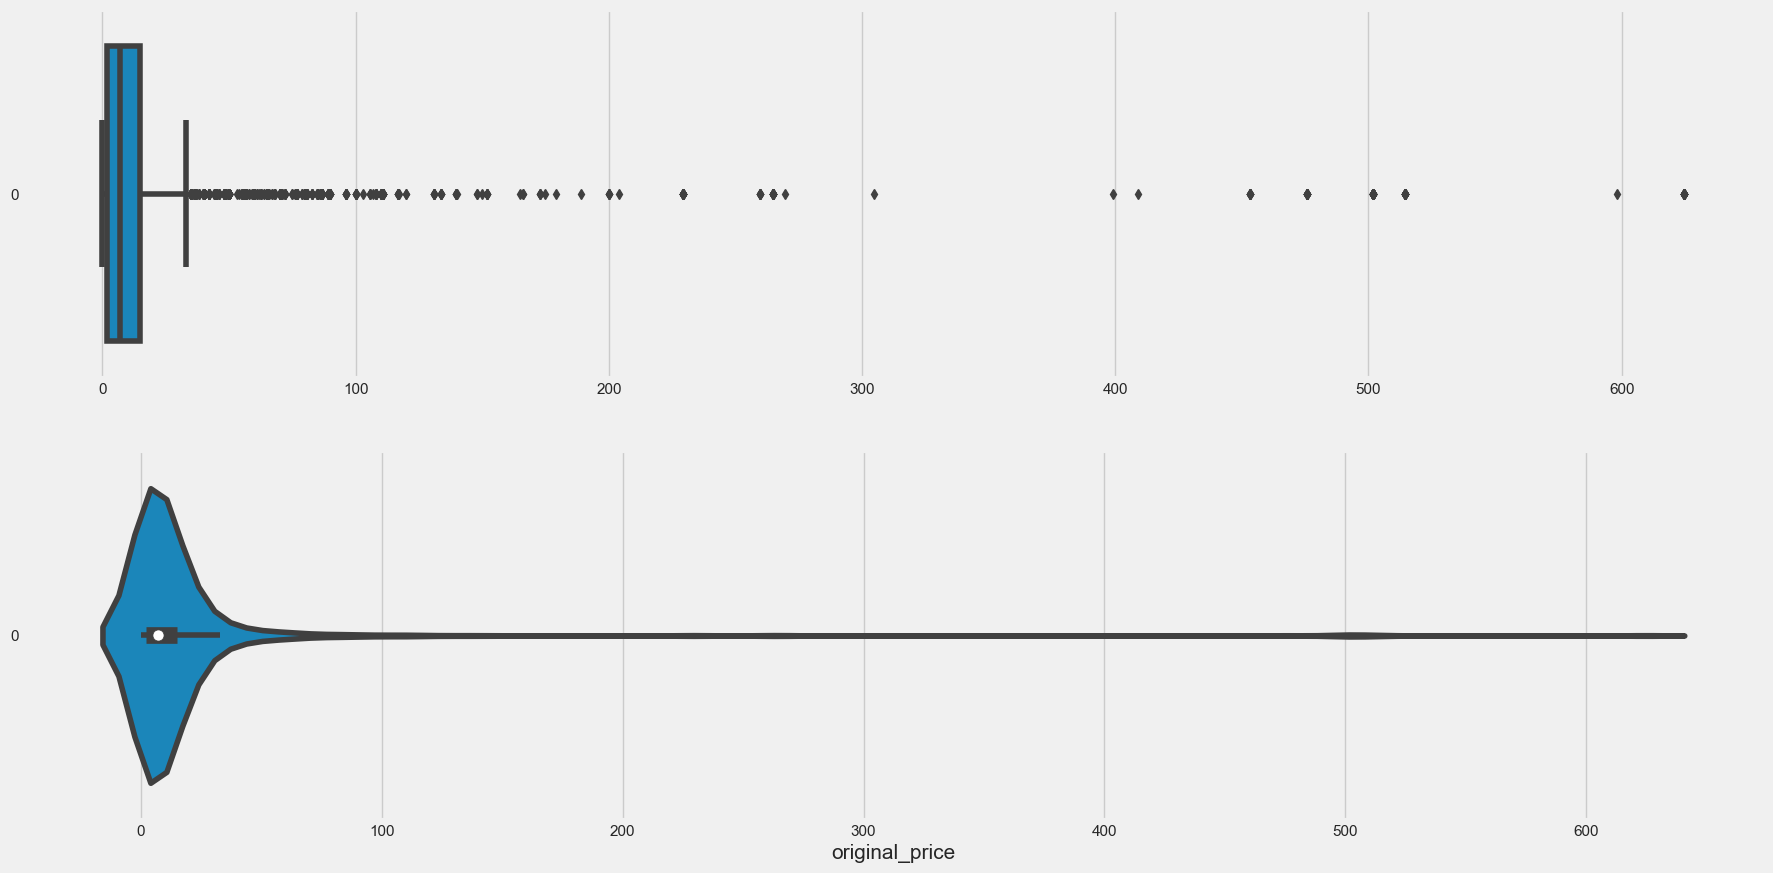

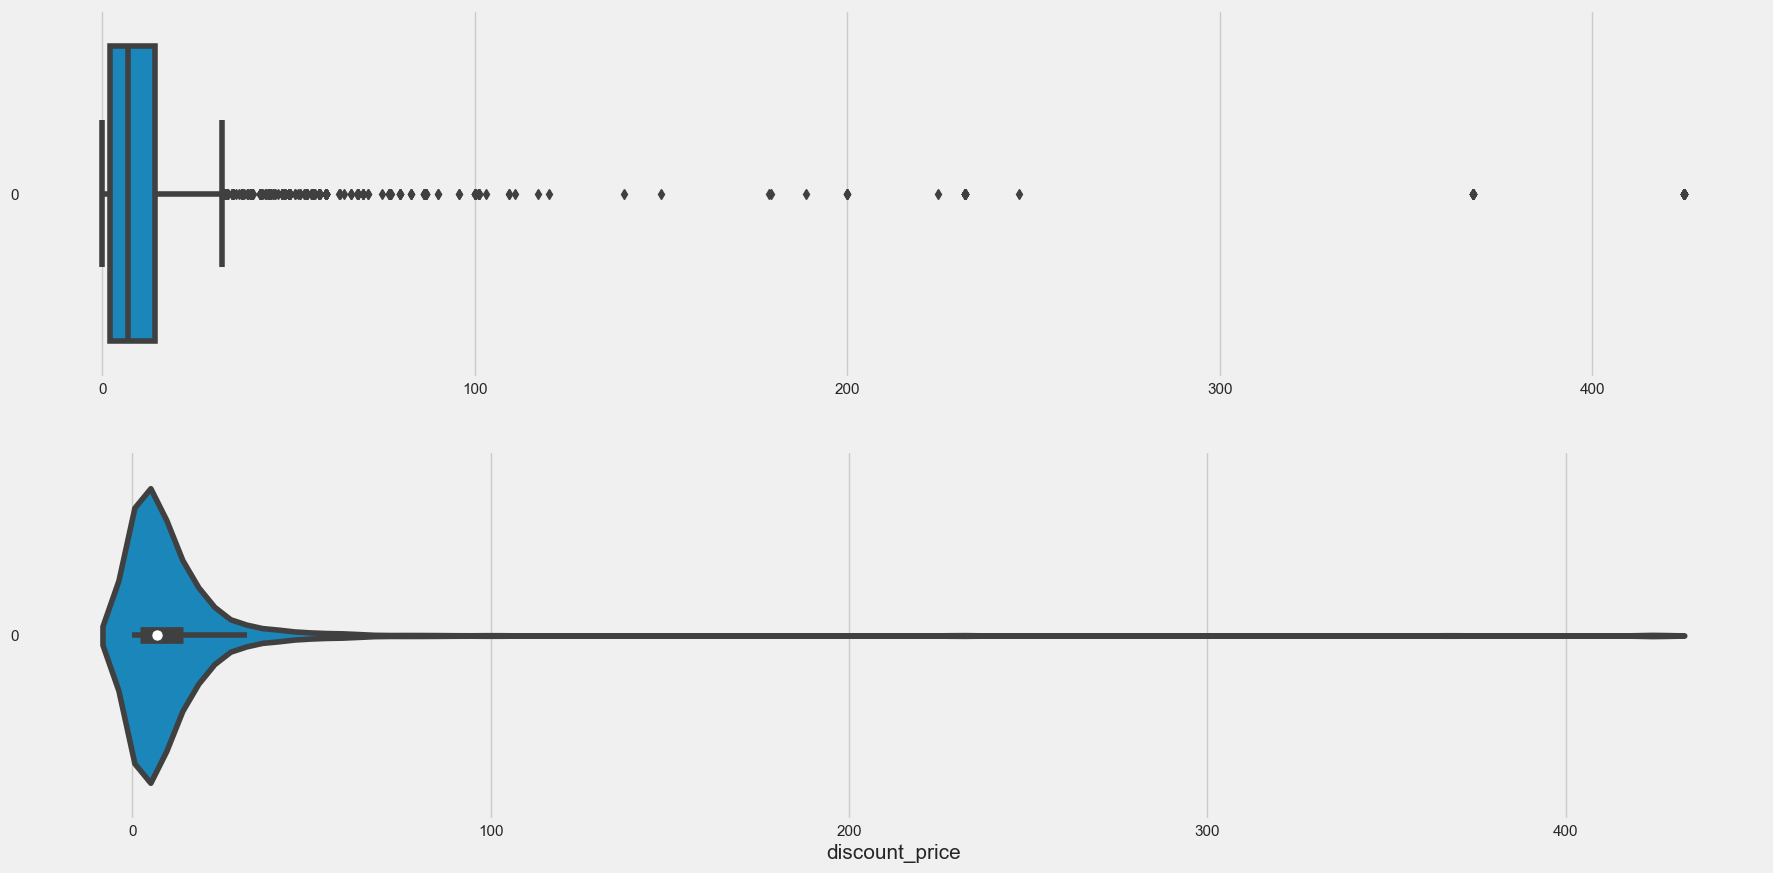

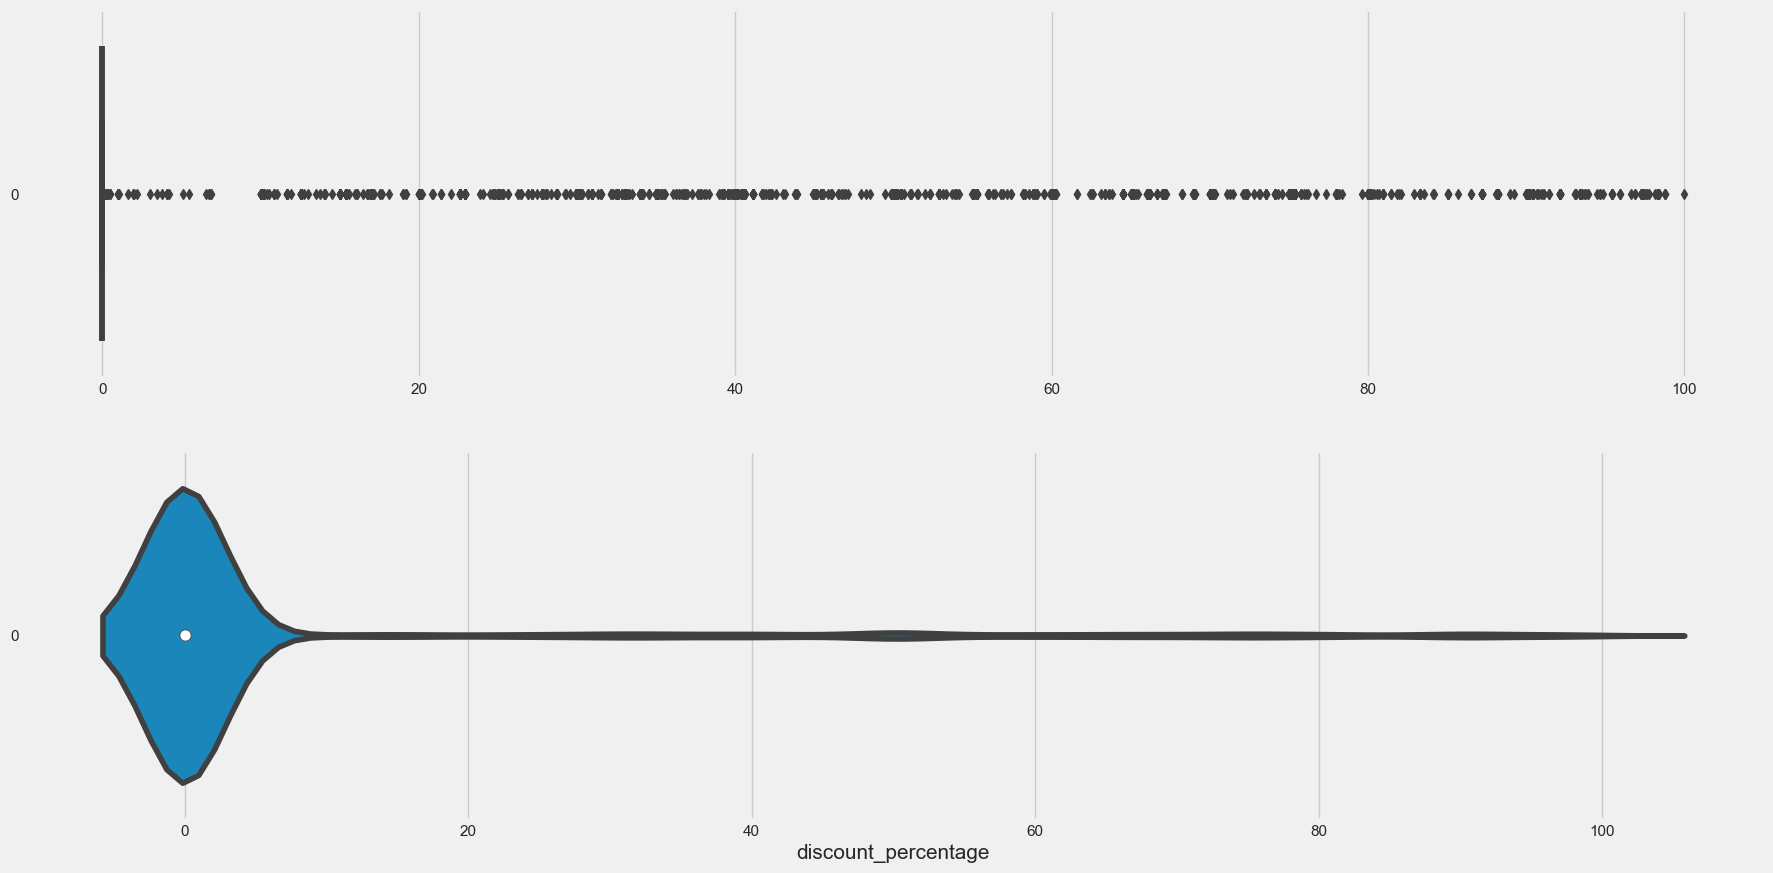

In [11]:
# Plots for original_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['original_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['original_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('original_price',fontsize=15)

# Plots for discount_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_price',fontsize=15)

# Plots for discount_percentage
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_percentage',fontsize=15)

### Correlation between pure numerical data and all reviews

In [12]:
numericalgames.corr()

all_reviews  original_price  discount_price  \
all_reviews             1.000000       -0.001266        0.016029   
original_price         -0.001266        1.000000        0.666244   
discount_price          0.016029        0.666244        1.000000   
discount_percentage    -0.037899        0.419365        0.071571   

                     discount_percentage  
all_reviews                    -0.037899  
original_price                  0.419365  
discount_price                  0.071571  
discount_percentage             1.000000

<AxesSubplot:>

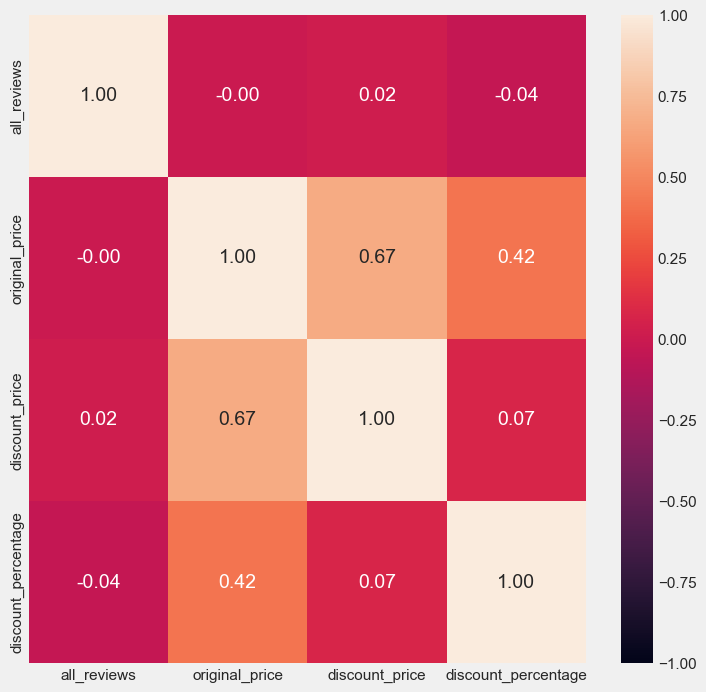

In [13]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(8,8))
sb.heatmap(numericalgames.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Mature content

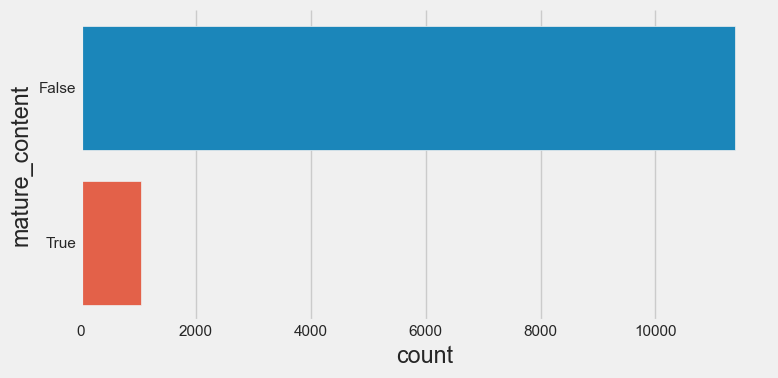

In [14]:
# Mature content 
sb.catplot(y = "mature_content", data = games, kind = "count", height = 4, aspect = 2) 

<AxesSubplot:xlabel='all_reviews', ylabel='mature_content'>

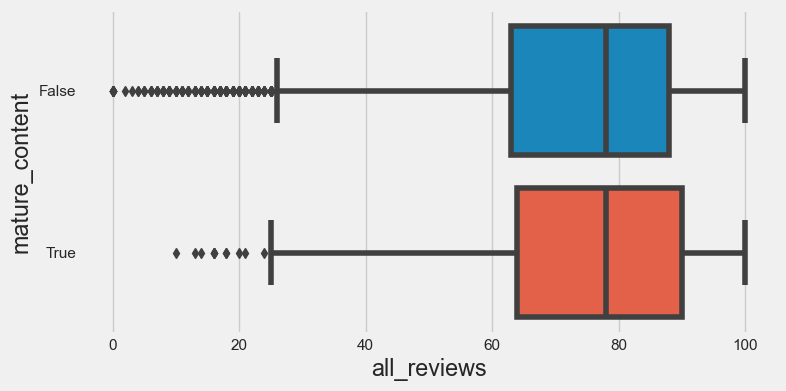

In [15]:
# Mature content vs all reviews

f = plt.figure(figsize=(8, 4))
sb.boxplot(x = "all_reviews", y = "mature_content", data = games, orient = "h", width = 0.8)

### Genre

In [16]:
# All genre 

allgenre = games.filter(regex='^genre_')
print("Dimension of allgenre: ", allgenre.shape)


Dimension of allgenre:  (12440, 25)


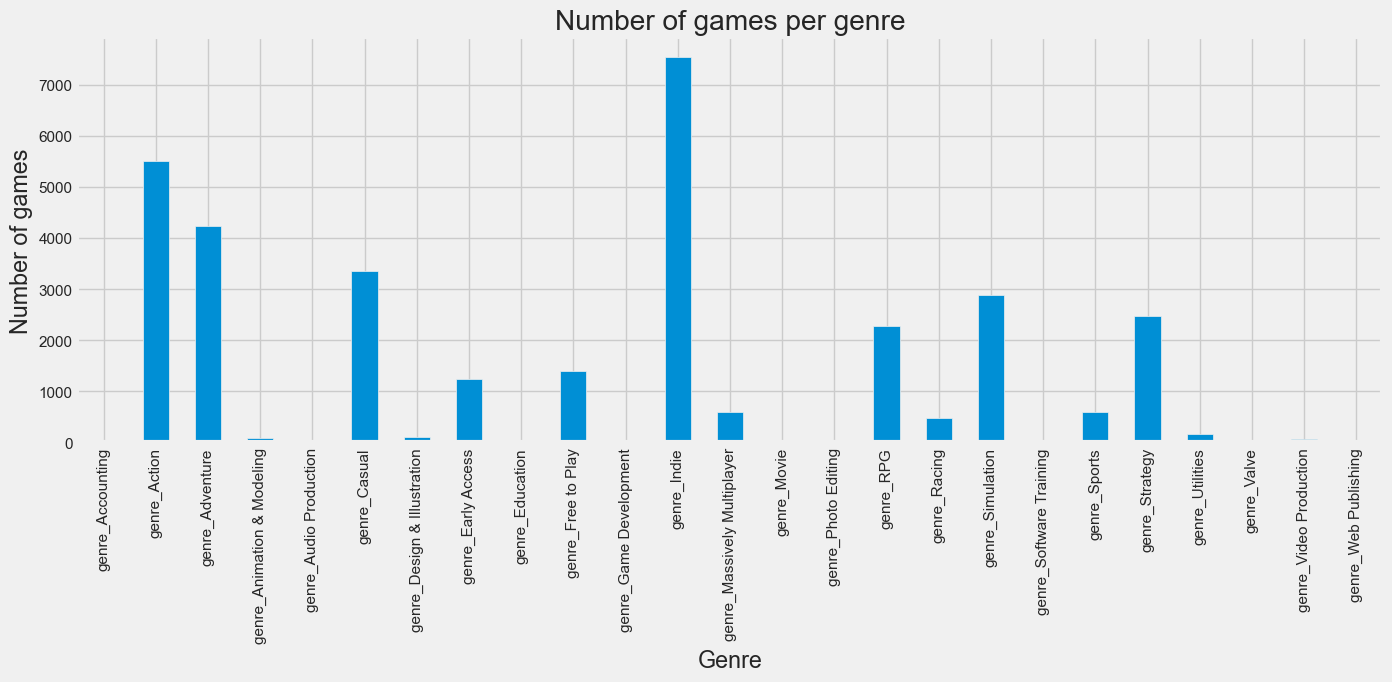

In [17]:
# All genre 

# create a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
allgenre.sum().plot(kind='bar', ax=ax)

# set plot labels
ax.set_title('Number of games per genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of games')

# show the plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-

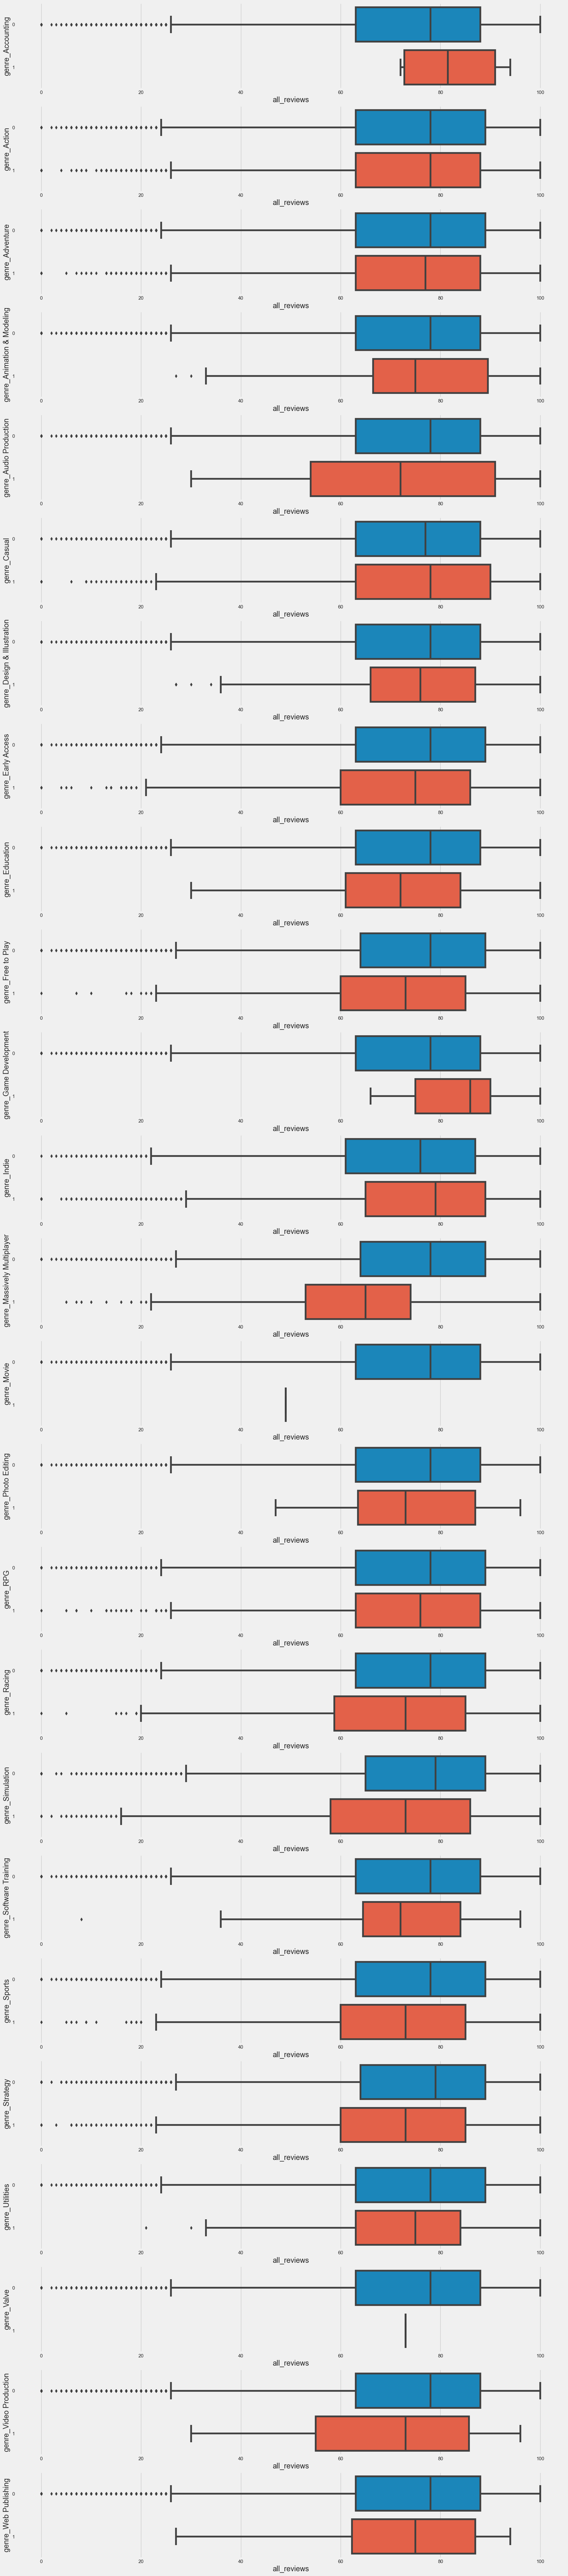

In [18]:
# All genre vs all reviews

# Concatenate all genre with all reviews
genre_reviews = pd.concat([allgenre, pd.DataFrame(games['all_reviews'])], axis = 1)

f, axes = plt.subplots(25, 1, figsize=(20, 100))

i=0
for thegenre in allgenre:
    sb.boxplot(x = "all_reviews", y = thegenre , data = genre_reviews, orient = "h", width = 0.8, ax = axes[i])
    i+=1




<AxesSubplot:>

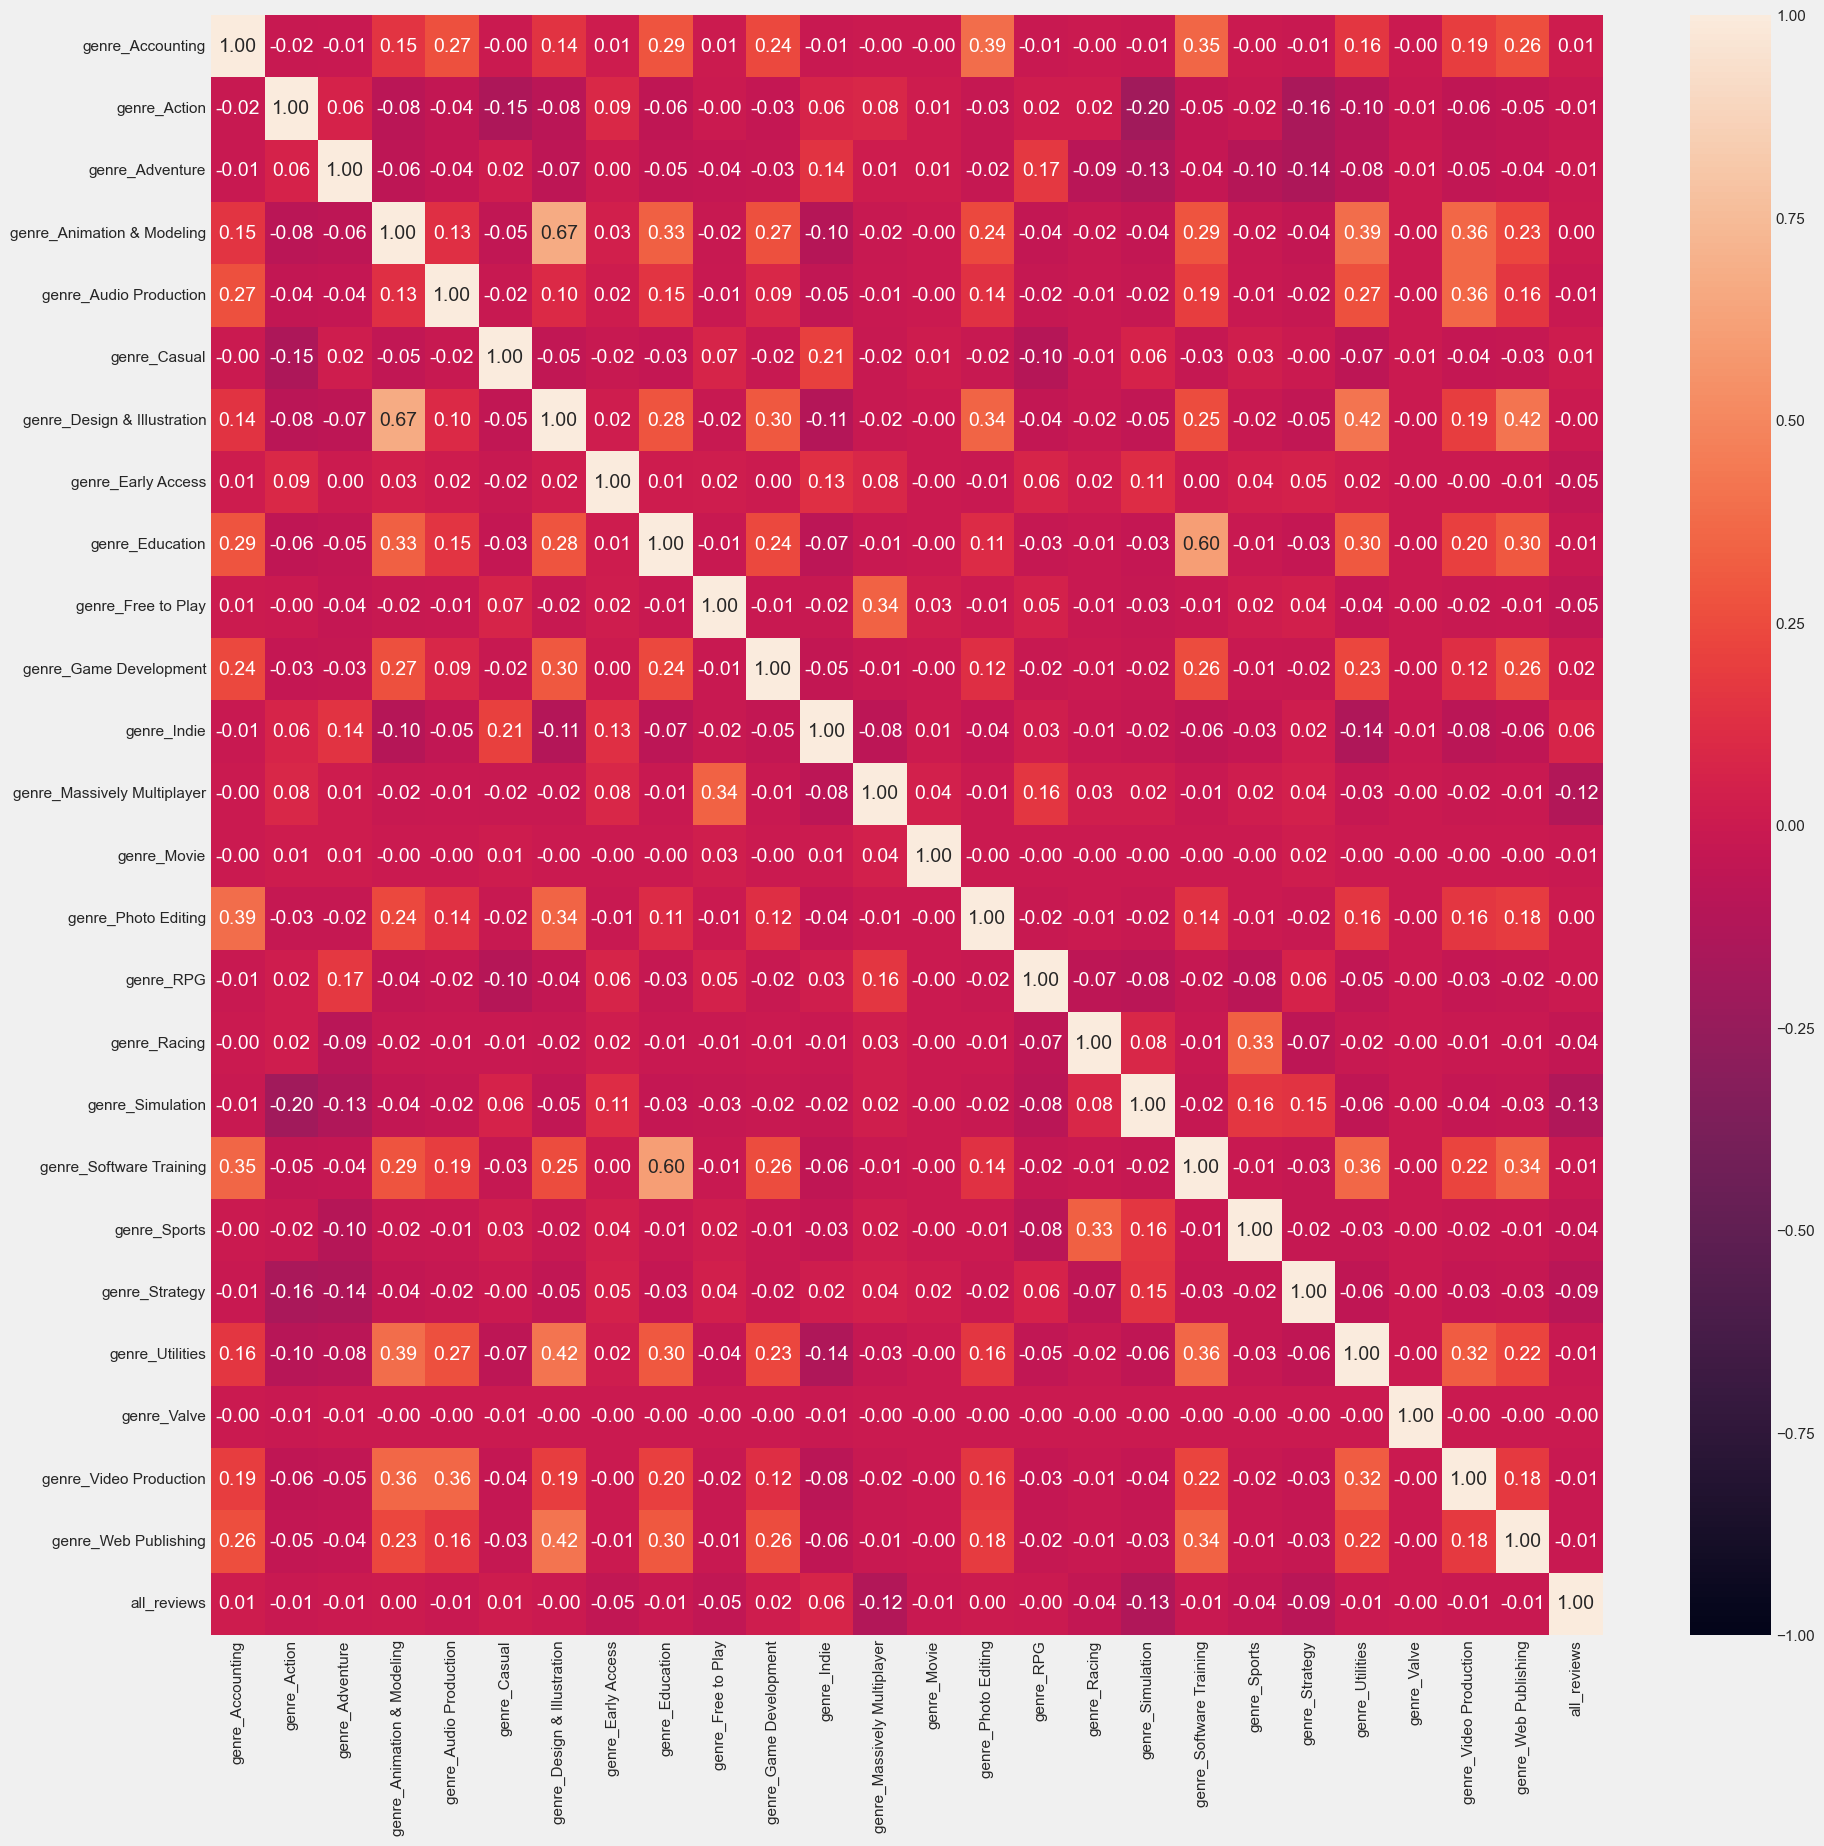

In [19]:
# All genre vs all reviews - correlation

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20,20))
sb.heatmap(genre_reviews.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Popular Tags

In [20]:
# All popular tags

allpopulartags = games.filter(regex='^popular_tags')
print("Number of popular tags: ", allpopulartags.shape[1])

allpopulartags.head()

Number of popular tags:  376


popular_tags_1980s  popular_tags_1990's  popular_tags_2.5D  \
0                   0                    0                  0   
1                   0                    0                  0   
2                   0                    0                  0   
3                   0                    0                  0   
4                   0                    0                  0   

   popular_tags_2D  popular_tags_2D Fighter  popular_tags_360 Video  \
0                0                        0                       0   
1                0                        0                       0   
2                0                        0                       0   
3                0                        0                       0   
4                0                        0                       0   

   popular_tags_3D  popular_tags_3D Platformer  popular_tags_3D Vision  \
0                0                           0                       0   
1                0                           0                       0   
2                0                           0                       0   
3                0                           0                       0   
4                0                           0                       0   

   popular_tags_4 Player Local  ...  popular_tags_Warhammer 40K  \
0                            0  ...                           0   
1                            0  ...                           0   
2                            0  ...                           0   
3                            0  ...                           0   
4                            0  ...                           0   

   popular_tags_Web Publishing  popular_tags_Werewolves  popular_tags_Western  \
0                            0                        0                     0   
1                            0                        0                     0   
2                            0                        0                     0   
3                            0                        0                     0   
4                            0                        0                     0   

   popular_tags_Word Game  popular_tags_World War I  \
0                       0                         0   
1                       0                         0   
2                       0                         0   
3                       0                         0   
4                       0                         0   

   popular_tags_World War II  popular_tags_Wrestling  popular_tags_Zombies  \
0                          0                       0                     1   
1                          0                       0                     0   
2                          0                       0                     0   
3                          0                       0                     1   
4                          0                       0                     0   

   popular_tags_e-sports  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 376 columns]

Since the number of popular tags is too large, it is difficult to show the number of each popular tag being tagged. Instead, we show the distribution of number of tags.

In [21]:
allpopulartags.sum()

popular_tags_1980s             68
popular_tags_1990's           100
popular_tags_2.5D              62
popular_tags_2D              1446
popular_tags_2D Fighter        90
                             ... 
popular_tags_World War I       30
popular_tags_World War II     178
popular_tags_Wrestling          9
popular_tags_Zombies          364
popular_tags_e-sports          54
Length: 376, dtype: int32

In [22]:
allpopulartags_distribution = allpopulartags.sum()
allpopulartags_distribution.describe()

count     376.000000
mean      275.375000
std       716.000499
min         0.000000
25%        27.000000
50%        68.000000
75%       203.250000
max      7949.000000
dtype: float64

<AxesSubplot:ylabel='Count'>

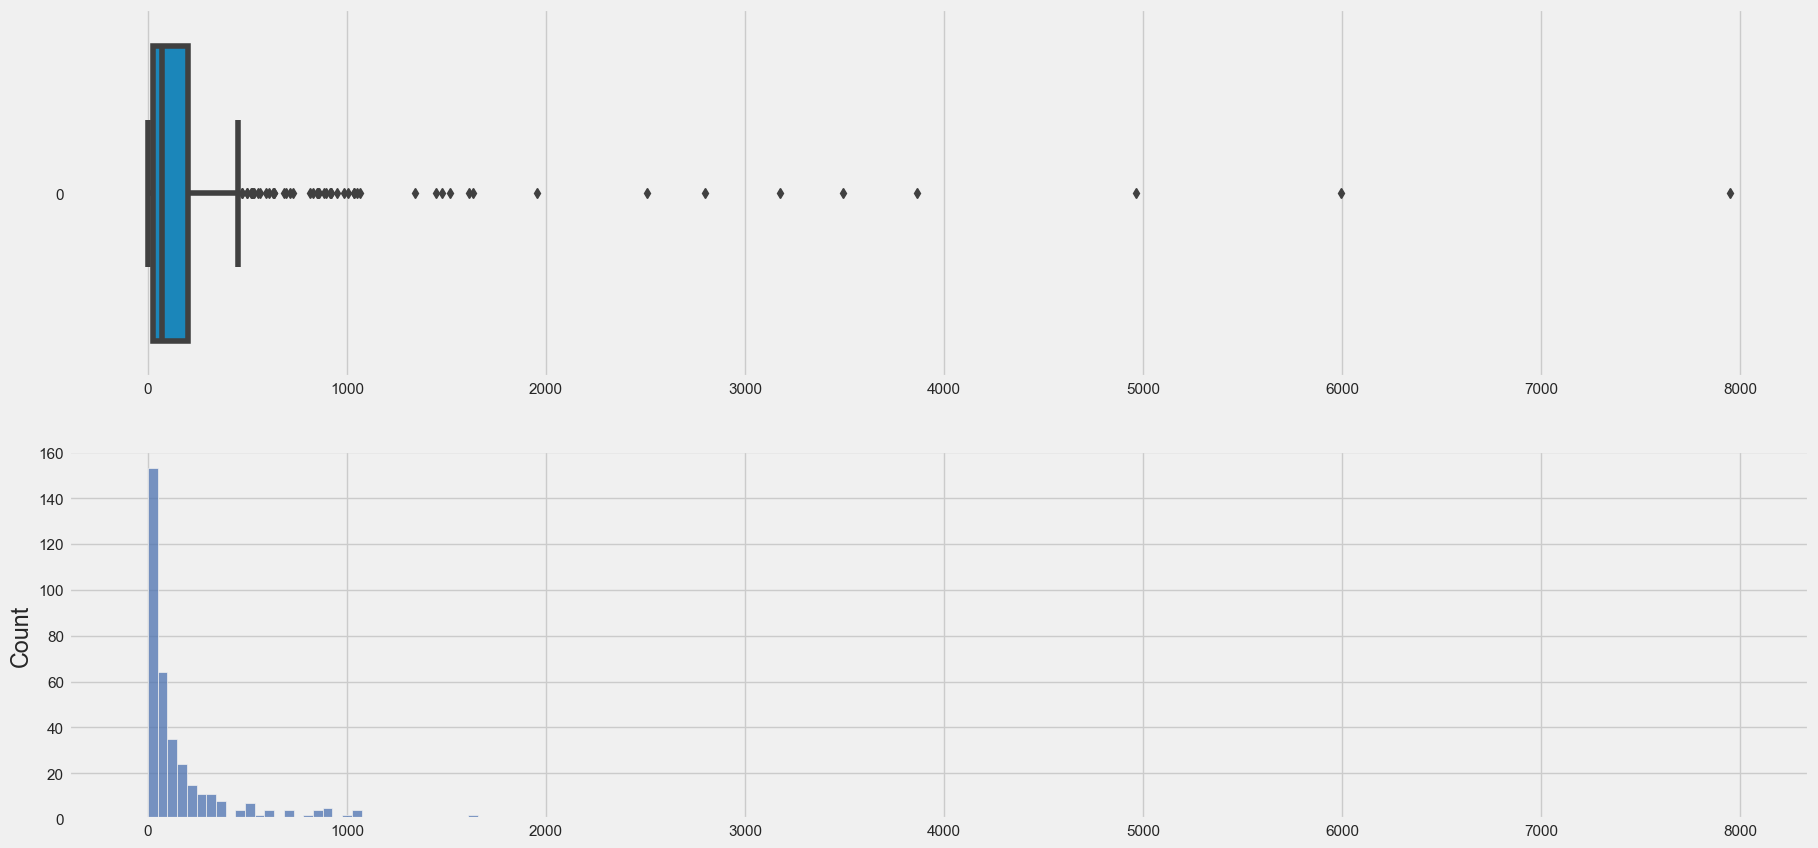

In [23]:
# all popular tags distribution
f, axes = plt.subplots(2,figsize=(20, 10))
sb.boxplot(data = allpopulartags_distribution, orient = "h", ax = axes[0])
sb.histplot(data = allpopulartags_distribution,ax = axes[1])


In [24]:
# All popular tags vs all reviews - correlation
populartags_reviews = pd.concat([allpopulartags, pd.DataFrame(games['all_reviews'])], axis = 1)
populartags_reviews_corr = (populartags_reviews.corr()['all_reviews'])


In [25]:
# Top 5 highest positive correlation popular tags with all reviews
print("Top 5 highest positive correlation popular tags with all reviews: ")
populartags_reviews_corr.sort_values(ascending=False).head(6) 


Top 5 highest positive correlation popular tags with all reviews: 


all_reviews                      1.000000
popular_tags_Great Soundtrack    0.153328
popular_tags_2D                  0.127605
popular_tags_Pixel Graphics      0.116295
popular_tags_Cute                0.109323
popular_tags_Story Rich          0.108560
Name: all_reviews, dtype: float64

In [26]:
# Top 5 highest negative correlation popular tags with all reviews

print("Top 5 highest negative correlation popular tags with all reviews: ")
populartags_reviews_corr.sort_values(ascending=True).head()

Top 5 highest negative correlation popular tags with all reviews: 


popular_tags_Massively Multiplayer   -0.127608
popular_tags_Simulation              -0.123128
popular_tags_Survival                -0.078867
popular_tags_Strategy                -0.076012
popular_tags_Management              -0.073808
Name: all_reviews, dtype: float64

### Languages

In [27]:
# Drop some inappropriate languages

games = games.drop(['languages_#lang_#lang_#lang_english**#lang_full_audio*#lang_full_audio', 
                   'languages_#lang_#lang_spanish*#lang_full_audio', 
                   'languages_#lang_german;',
                   'languages_(all with full audio support)'], axis = 1)

In [28]:
# All languages
alllanguages = games.filter(regex='^languages_')
print("Number of languages: ", alllanguages.shape[1])

alllanguages.head()

Number of languages:  30


languages_Arabic  languages_Bulgarian  languages_Czech  languages_Danish  \
0                 0                    0                0                 0   
1                 1                    0                0                 0   
2                 0                    0                0                 0   
3                 0                    0                1                 0   
4                 0                    0                0                 0   

   languages_Dutch  languages_English  languages_Finnish  languages_French  \
0                0                  1                  0                 1   
1                0                  1                  0                 1   
2                0                  1                  0                 1   
3                0                  1                  0                 1   
4                0                  1                  0                 1   

   languages_German  languages_Greek  ...  languages_Simplified Chinese  \
0                 1                0  ...                             0   
1                 1                0  ...                             1   
2                 1                0  ...                             0   
3                 1                0  ...                             1   
4                 1                0  ...                             0   

   languages_Slovakian  languages_Spanish - Latin America  \
0                    0                                  0   
1                    0                                  0   
2                    0                                  0   
3                    0                                  0   
4                    0                                  0   

   languages_Spanish - Spain  languages_Swedish  languages_Thai  \
0                          1                  0               0   
1                          1                  0               1   
2                          0                  0               0   
3                          1                  0               0   
4                          0                  0               0   

   languages_Traditional Chinese  languages_Turkish  languages_Ukrainian  \
0                              1                  0                    0   
1                              1                  1                    1   
2                              0                  0                    0   
3                              1                  0                    0   
4                              0                  0                    0   

   languages_Vietnamese  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 30 columns]

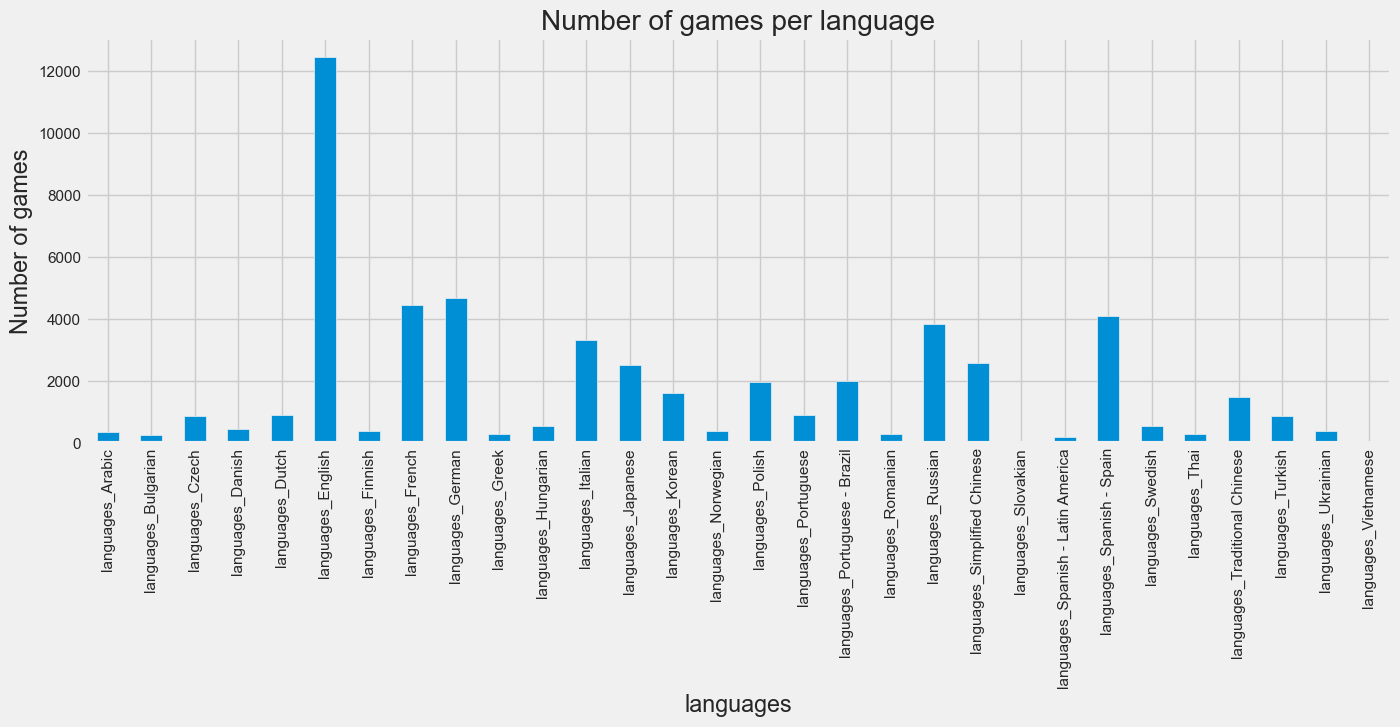

In [29]:
# All genre 

# create a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
alllanguages.sum().plot(kind='bar', ax=ax)

# set plot labels
ax.set_title('Number of games per language')
ax.set_xlabel('languages')
ax.set_ylabel('Number of games')

# show the plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-

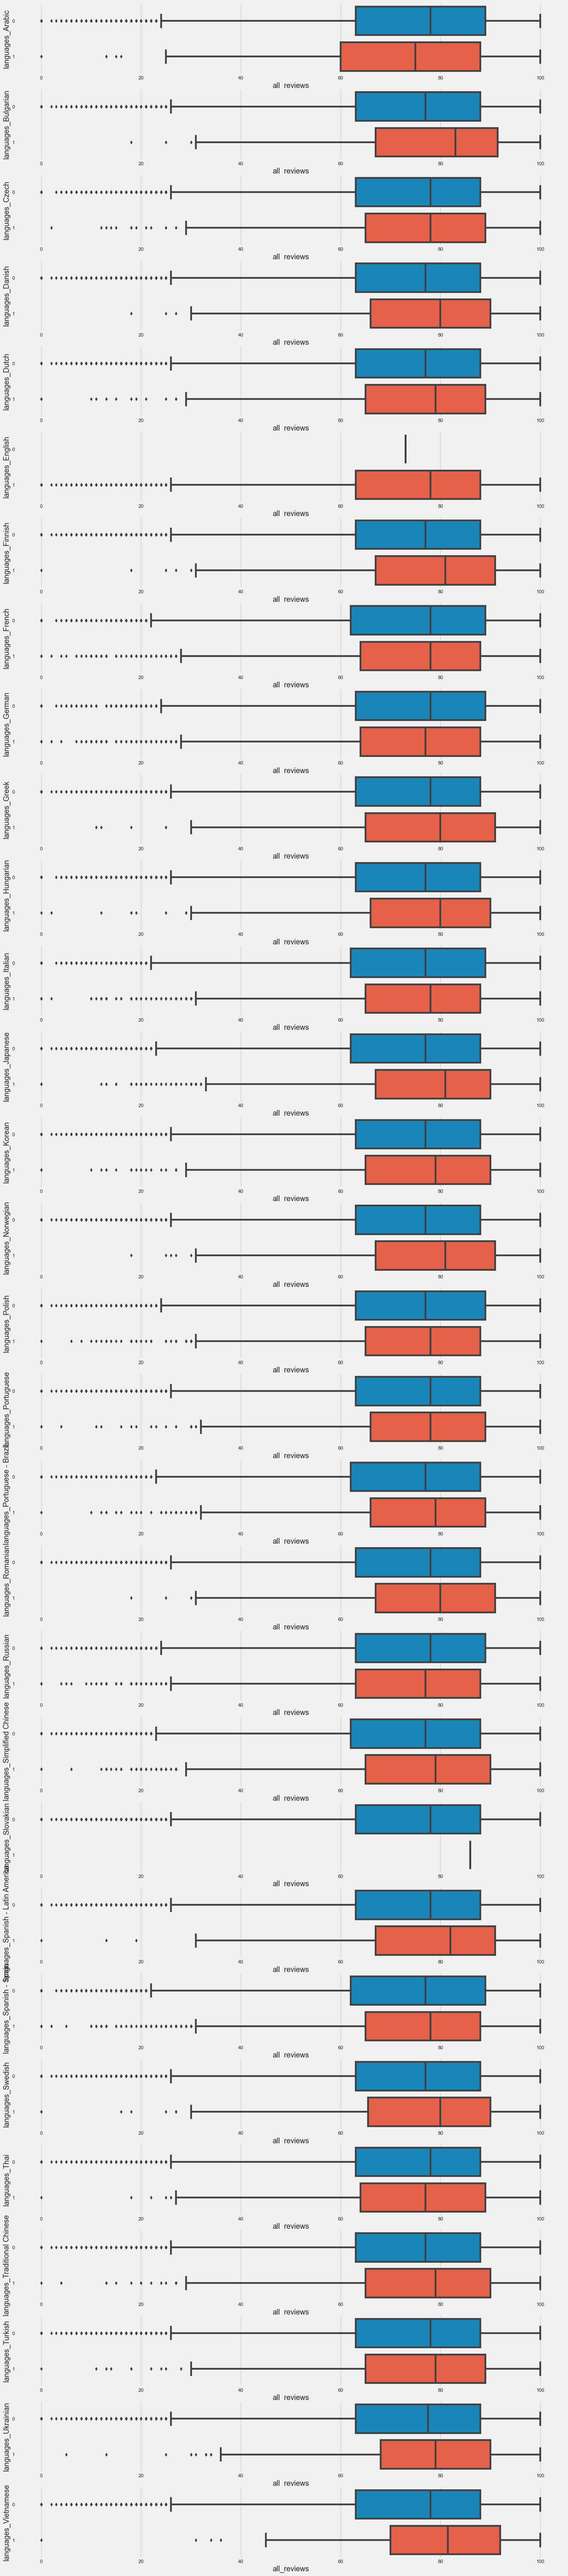

In [30]:
# All languages vs all reviews

# Concatenate all genre with all reviews

languages_reviews = pd.concat([alllanguages, pd.DataFrame(games['all_reviews'])], axis = 1)

f, axes = plt.subplots(30, 1, figsize=(20, 100))

i=0
for thelanguage in alllanguages:
    sb.boxplot(x = "all_reviews", y = thelanguage , data = languages_reviews, orient = "h", width = 0.8, ax = axes[i])
    i+=1

<AxesSubplot:>

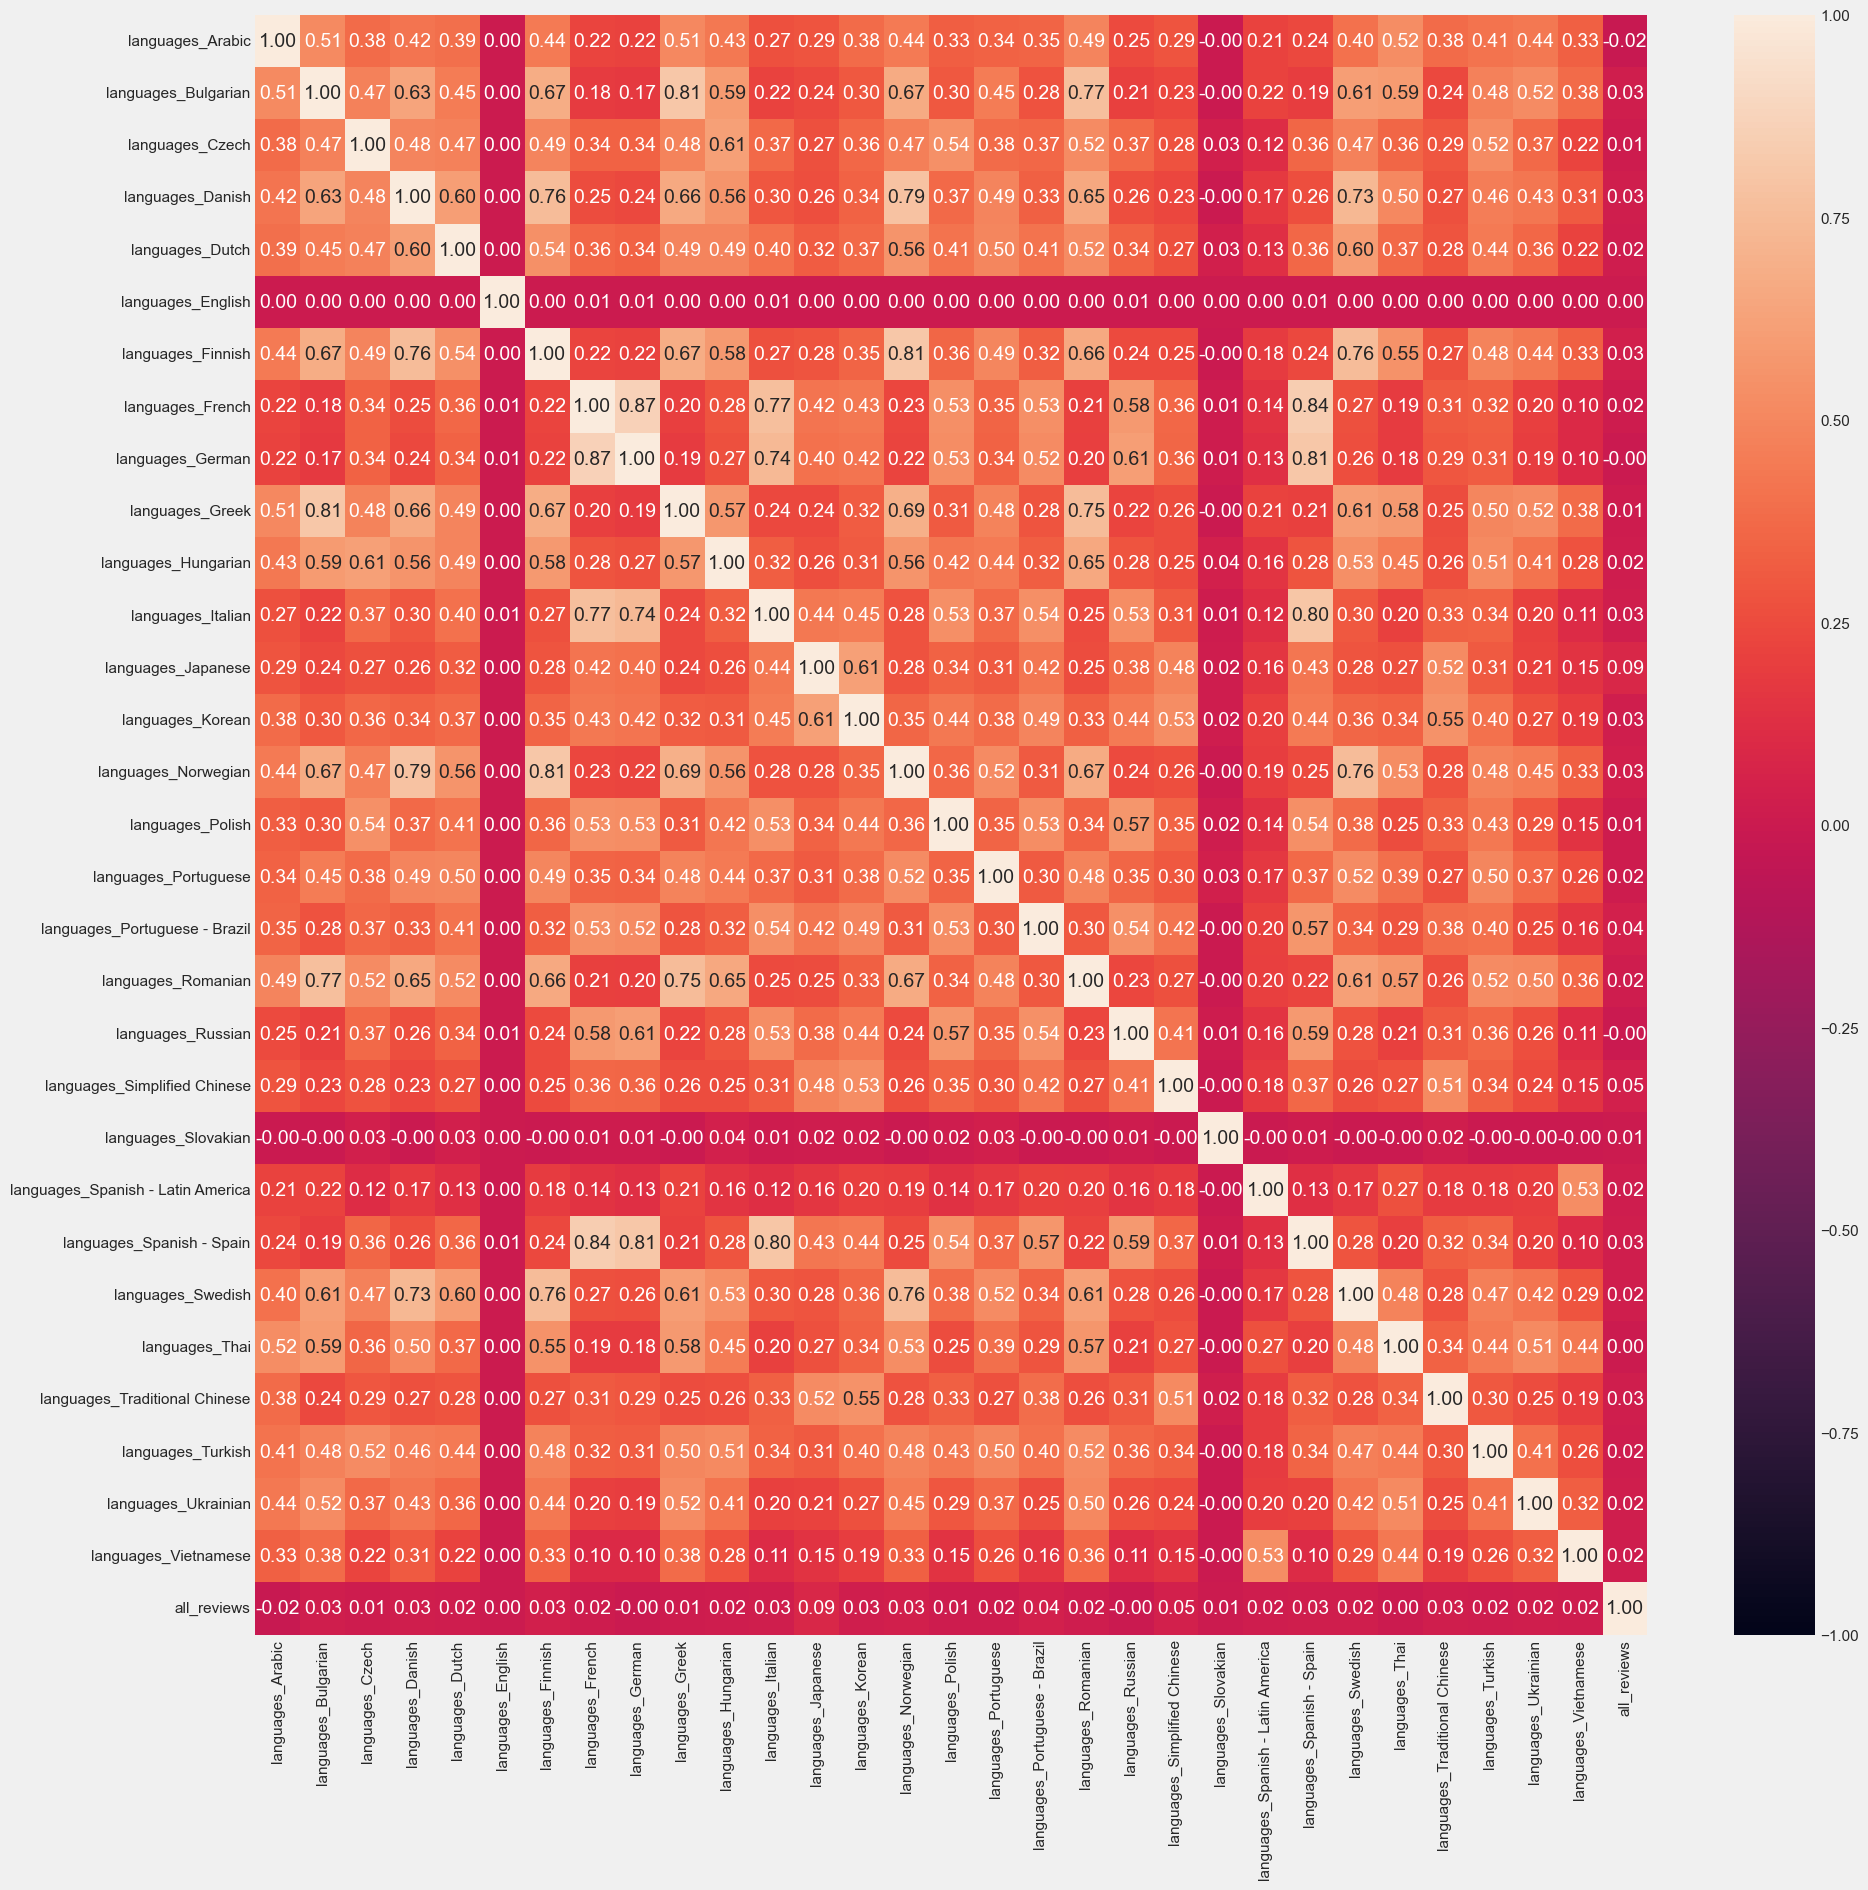

In [31]:
# All languages vs all reviews - correlation

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20,20))
sb.heatmap(languages_reviews.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Overview of correlation between original price, discount price, discount percentage, genre, popular tags, and languages and all reviews

In [32]:
gamesrelation = games.drop(['release_date', 'publisher', 'developer'], axis = 1)
gamesrelation.head()

name  all_reviews  mature_content  original_price  \
0                           DOOM           92           False           19.99   
1  PLAYERUNKNOWN'S BATTLEGROUNDS           49            True           29.99   
2                     BATTLETECH           71           False           39.99   
3                           DayZ           61           False           44.99   
4                     EVE Online           74           False            0.00   

   discount_price  popular_tags_1980s  popular_tags_1990's  popular_tags_2.5D  \
0           14.99                   0                    0                  0   
1           29.99                   0                    0                  0   
2           39.99                   0                    0                  0   
3           44.99                   0                    0                  0   
4            0.00                   0                    0                  0   

   popular_tags_2D  popular_tags_2D Fighter  ...  genre_Racing  \
0                0                        0  ...             0   
1                0                        0  ...             0   
2                0                        0  ...             0   
3                0                        0  ...             0   
4                0                        0  ...             0   

   genre_Simulation  genre_Software Training  genre_Sports  genre_Strategy  \
0                 0                        0             0               0   
1                 0                        0             0               0   
2                 0                        0             0               1   
3                 0                        0             0               0   
4                 0                        0             0               1   

   genre_Utilities  genre_Valve  genre_Video Production  genre_Web Publishing  \
0                0            0                       0                     0   
1                0            0                       0                     0   
2                0            0                       0                     0   
3                0            0                       0                     0   
4                0            0                       0                     0   

   discount_percentage  
0            25.012506  
1             0.000000  
2             0.000000  
3             0.000000  
4             0.000000  

[5 rows x 437 columns]

In [33]:
gamescorr = gamesrelation.corr()
gamescorr = gamescorr.drop('all_reviews', axis = 0) # drop 'all_reviews' row
gamescorr['all_reviews']

mature_content            0.014772
original_price           -0.001266
discount_price            0.016029
popular_tags_1980s        0.038047
popular_tags_1990's       0.065144
                            ...   
genre_Utilities          -0.011700
genre_Valve              -0.000375
genre_Video Production   -0.014324
genre_Web Publishing     -0.008883
discount_percentage      -0.037899
Name: all_reviews, Length: 435, dtype: float64

In [34]:
gamescorr['all_reviews'].describe()

count    433.000000
mean       0.010169
std        0.032755
min       -0.127608
25%       -0.004025
50%        0.009995
75%        0.023757
max        0.153328
Name: all_reviews, dtype: float64

<AxesSubplot:xlabel='all_reviews', ylabel='Count'>

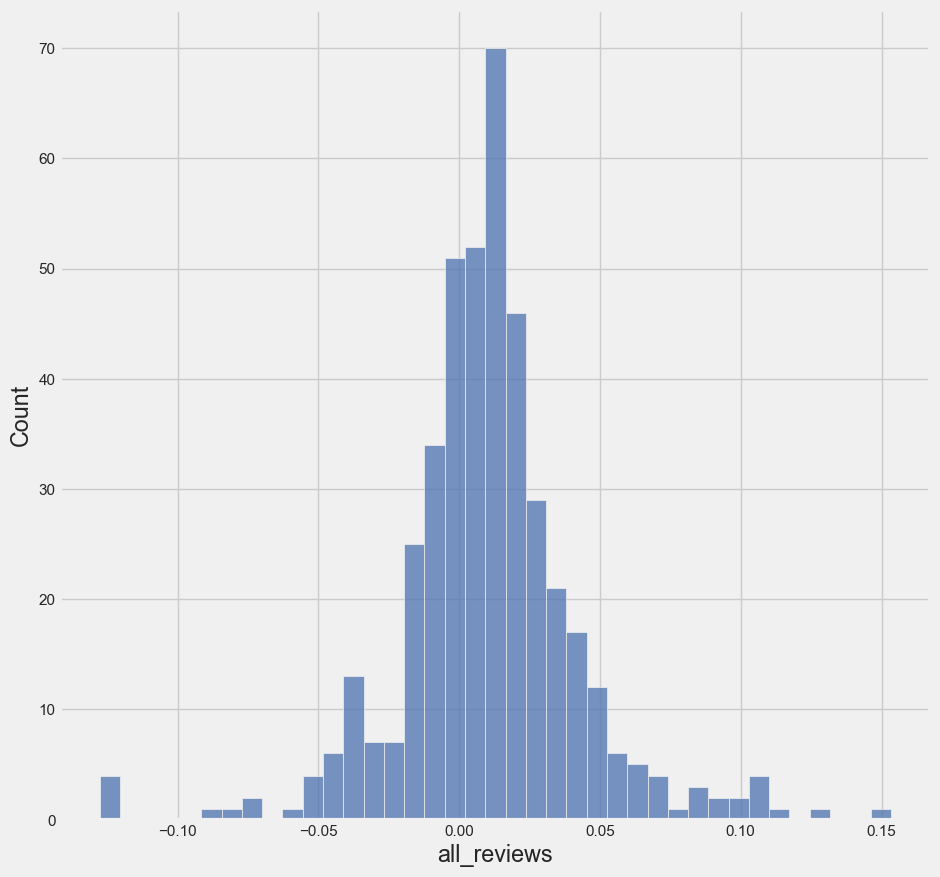

In [35]:
f = plt.figure(figsize=(10,10))
sb.histplot(data=gamescorr['all_reviews'])

In [36]:
# Top 5 highest negative correlation with all reviews

print("Top 5 highest negative correlation popular tags with all reviews: ")
gamescorr['all_reviews'].sort_values(ascending=False).head()

Top 5 highest negative correlation popular tags with all reviews: 


popular_tags_Great Soundtrack    0.153328
popular_tags_2D                  0.127605
popular_tags_Pixel Graphics      0.116295
popular_tags_Cute                0.109323
popular_tags_Story Rich          0.108560
Name: all_reviews, dtype: float64

In [37]:
# Top 5 highest negative correlation popular tags with all reviews

print("Top 5 highest negative correlation popular tags with all reviews: ")
gamescorr['all_reviews'].sort_values(ascending=True).head()

Top 5 highest negative correlation popular tags with all reviews: 


popular_tags_Massively Multiplayer   -0.127608
genre_Simulation                     -0.126744
popular_tags_Simulation              -0.123128
genre_Massively Multiplayer          -0.123059
genre_Strategy                       -0.086399
Name: all_reviews, dtype: float64

Popular tag Great Soundtrack has the largest positive correlation with all reviews.
Popular tag Massively Multiplayer has the largest negative correlation with all reviews.


### Developer

In [38]:
games['developer'].value_counts()

Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               57
SCS Software                  42
CAPCOM Co., Ltd.              33
                              ..
Evlanic Entertainment          1
Sigtrap                        1
ColePowered Games              1
Invi Games                     1
Phoesion                       1
Name: developer, Length: 8179, dtype: int64

There are many different developer found in this dataset, so we will only be looking at developer who had developed at least 30 games so that it would be at least follow a normal distribution via central limit theorem.

In [39]:
(games['developer'].value_counts() >= 30).sum()

7

In [40]:
value_counts = games['developer'].value_counts()
to_change = value_counts[value_counts >= 30].index

moredeveloper = games[games['developer'].isin(to_change)]
moredeveloper['developer'].value_counts()

Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               57
SCS Software                  42
CAPCOM Co., Ltd.              33
Arc System Works              31
RewindApp                     30
Name: developer, dtype: int64

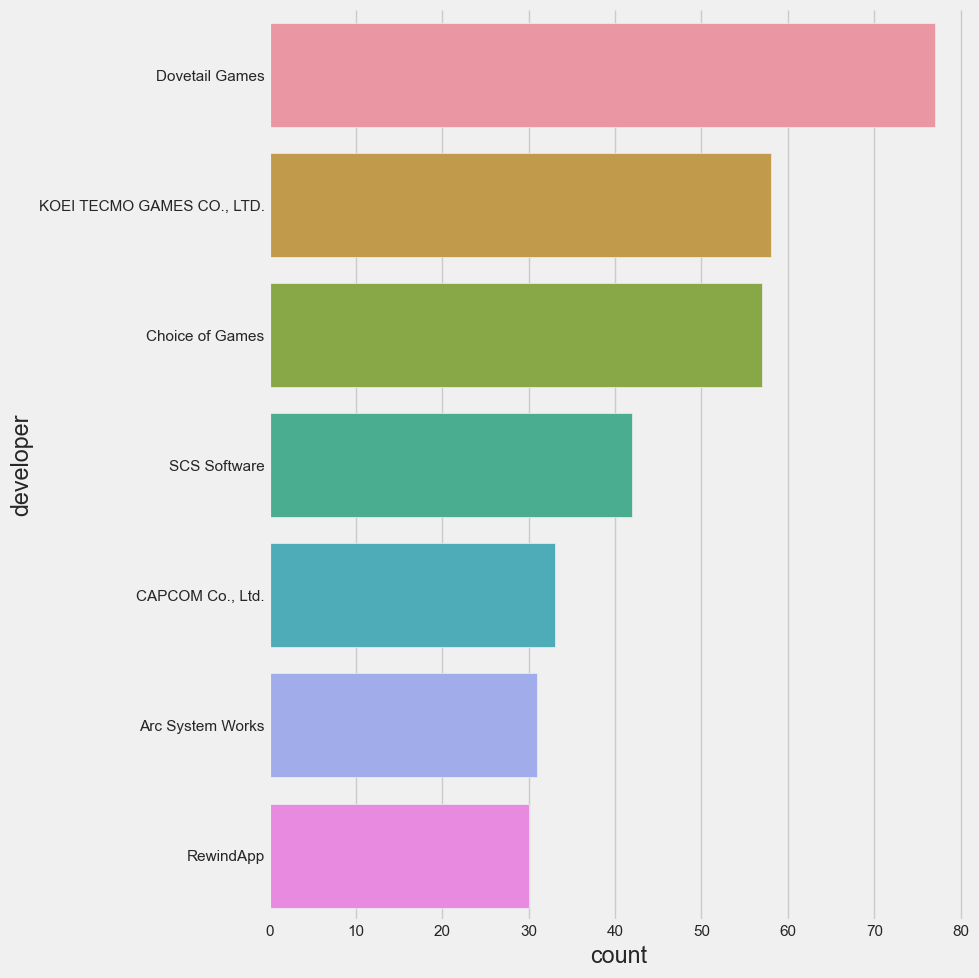

In [41]:
sb.catplot(y = "developer", data = moredeveloper, kind = "count", order = moredeveloper['developer'].value_counts().index, height = 10)

<AxesSubplot:xlabel='all_reviews', ylabel='developer'>

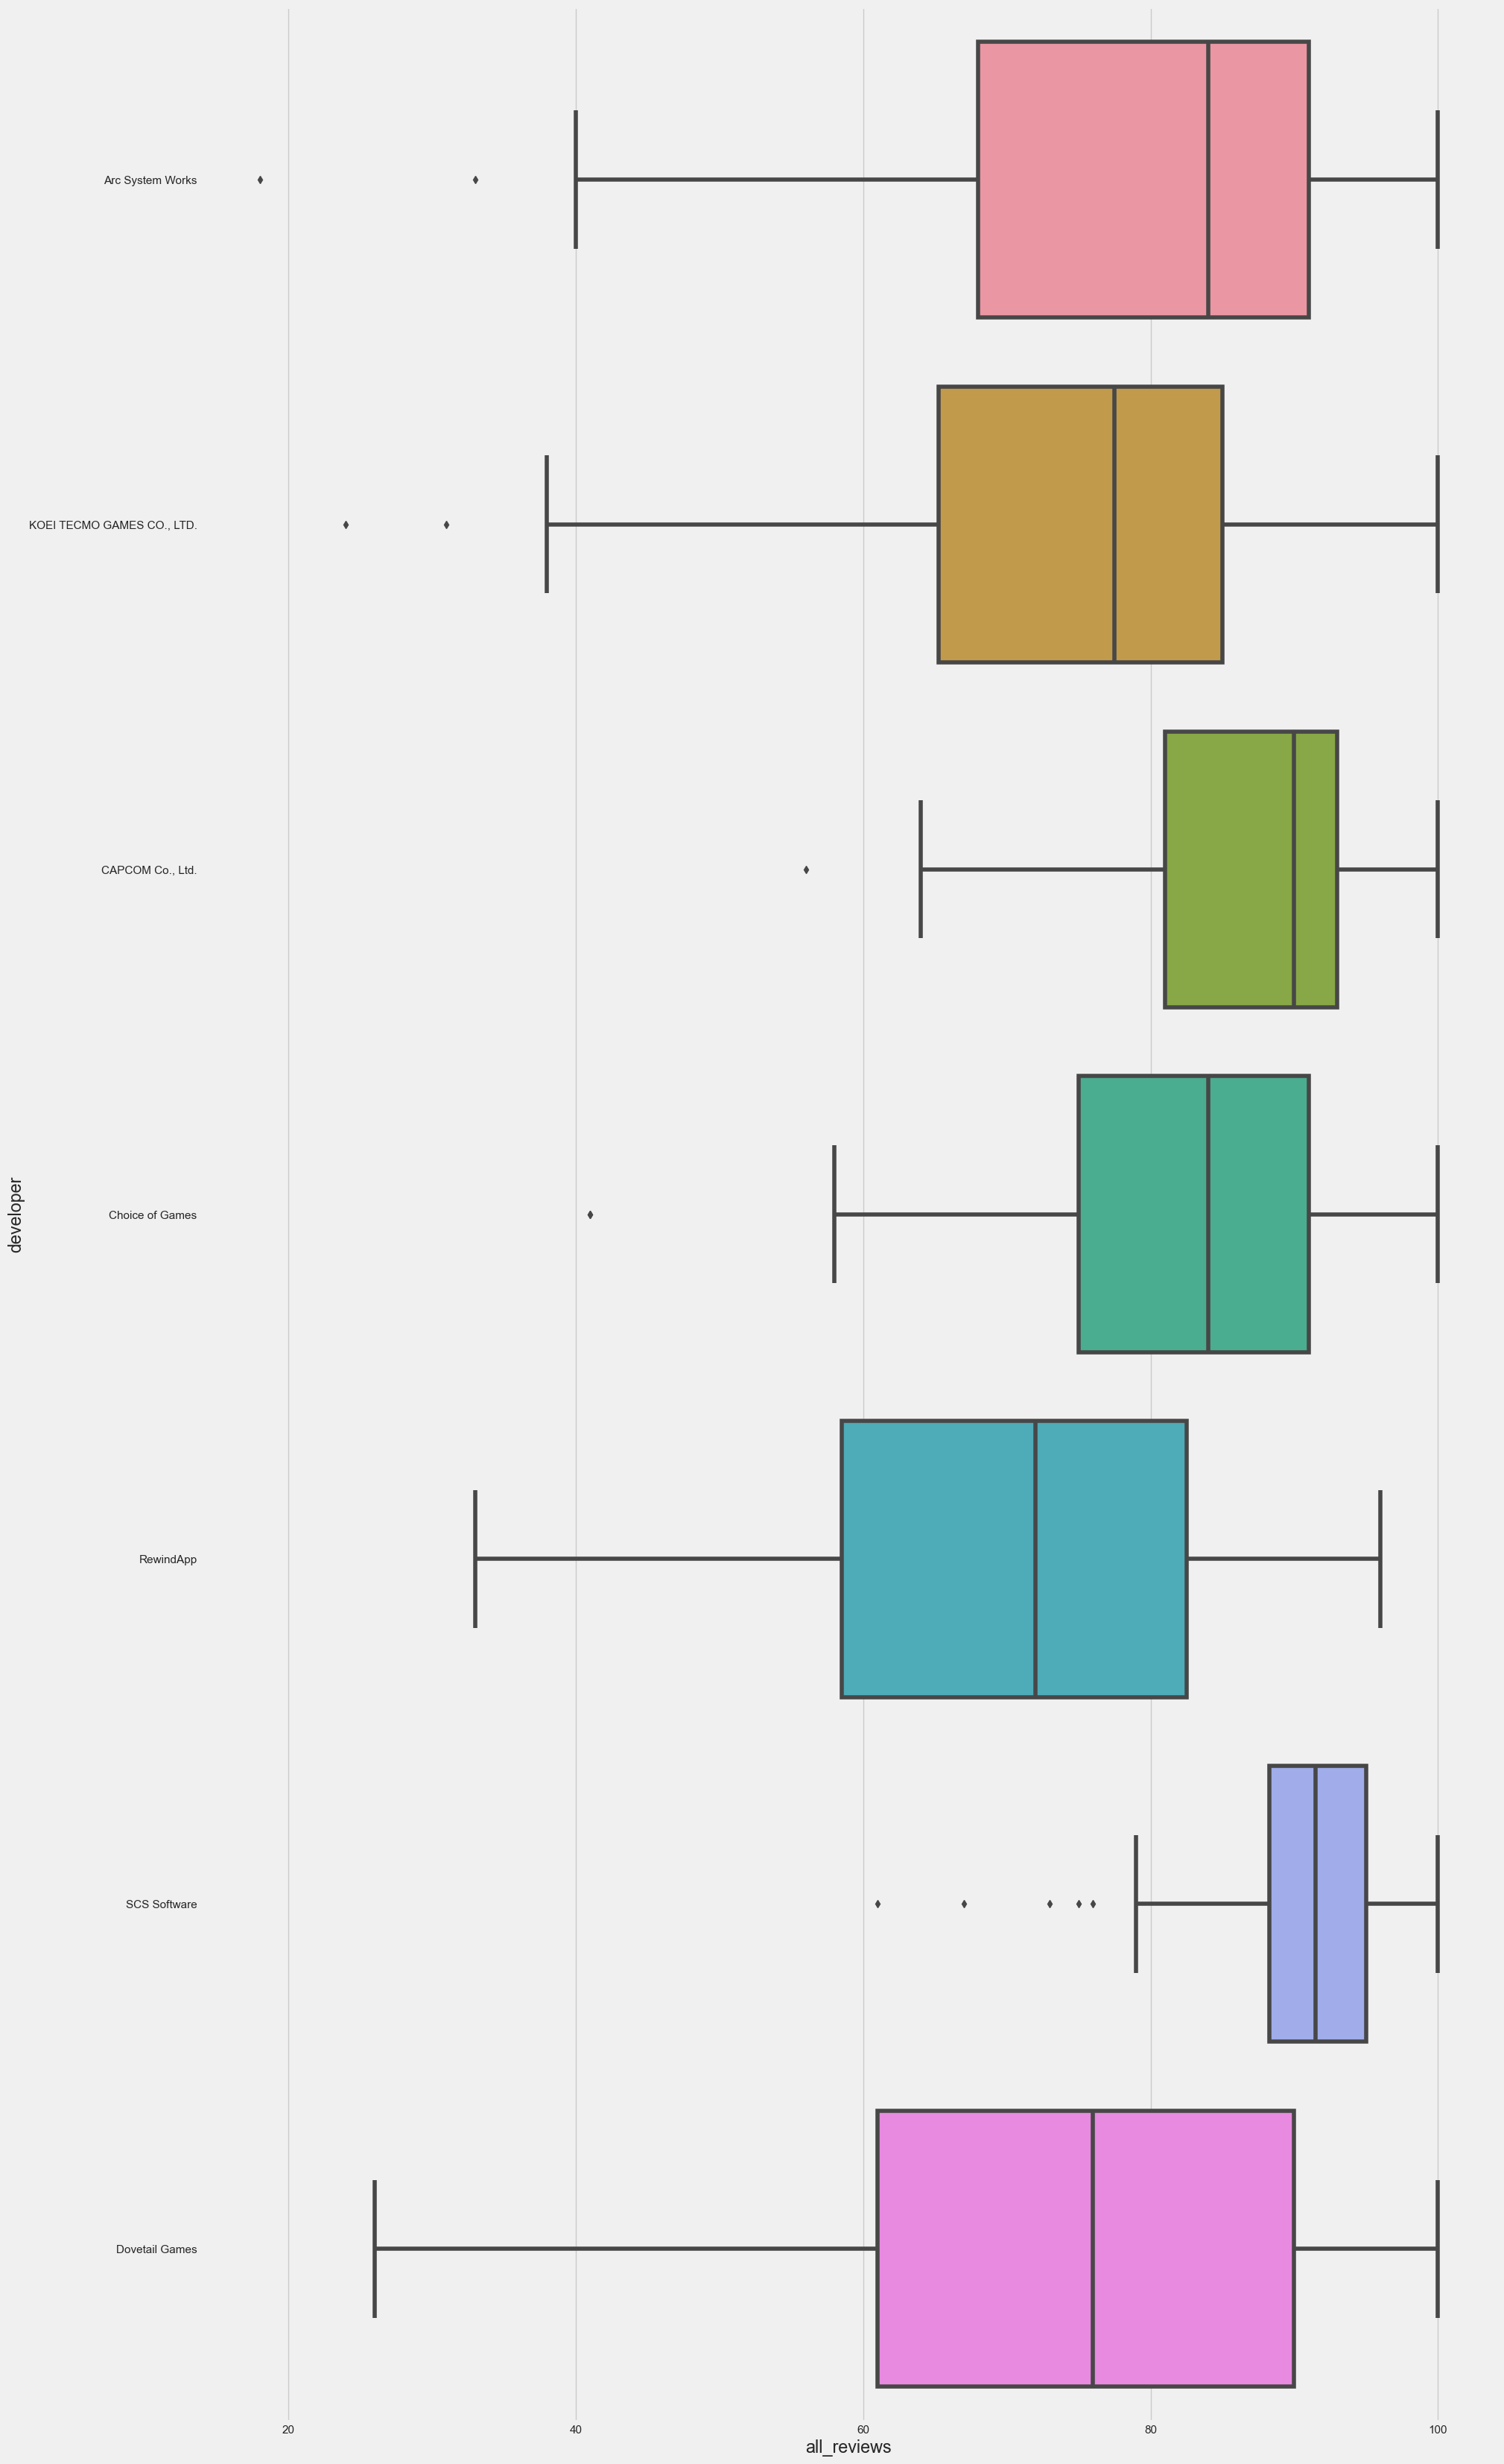

In [42]:
# Developer vs All reviews

f = plt.figure(figsize=(20,40))
sb.boxplot(x = "all_reviews", y = "developer", data = moredeveloper, orient = "h", width = 0.8)

### Publisher

In [43]:
print("Number of unique publisher: ", games['publisher'].nunique())
print("Number of unique publisher who published more than 30 games: ", (games['publisher'].value_counts() >=30).sum())

Number of unique publisher:  6514
Number of unique publisher who published more than 30 games:  31


There are many different `publisher` found in this dataset, it is difficult to show all publishers at here. Thus, we will only be looking at publisher who had published at `least 30` games so that it would be at least follow a normal distribution via central limit theorem.

In [44]:
value_counts = games['publisher'].value_counts()
to_change = value_counts[value_counts >= 30].index
morepublisher = games[games['publisher'].isin(to_change)]

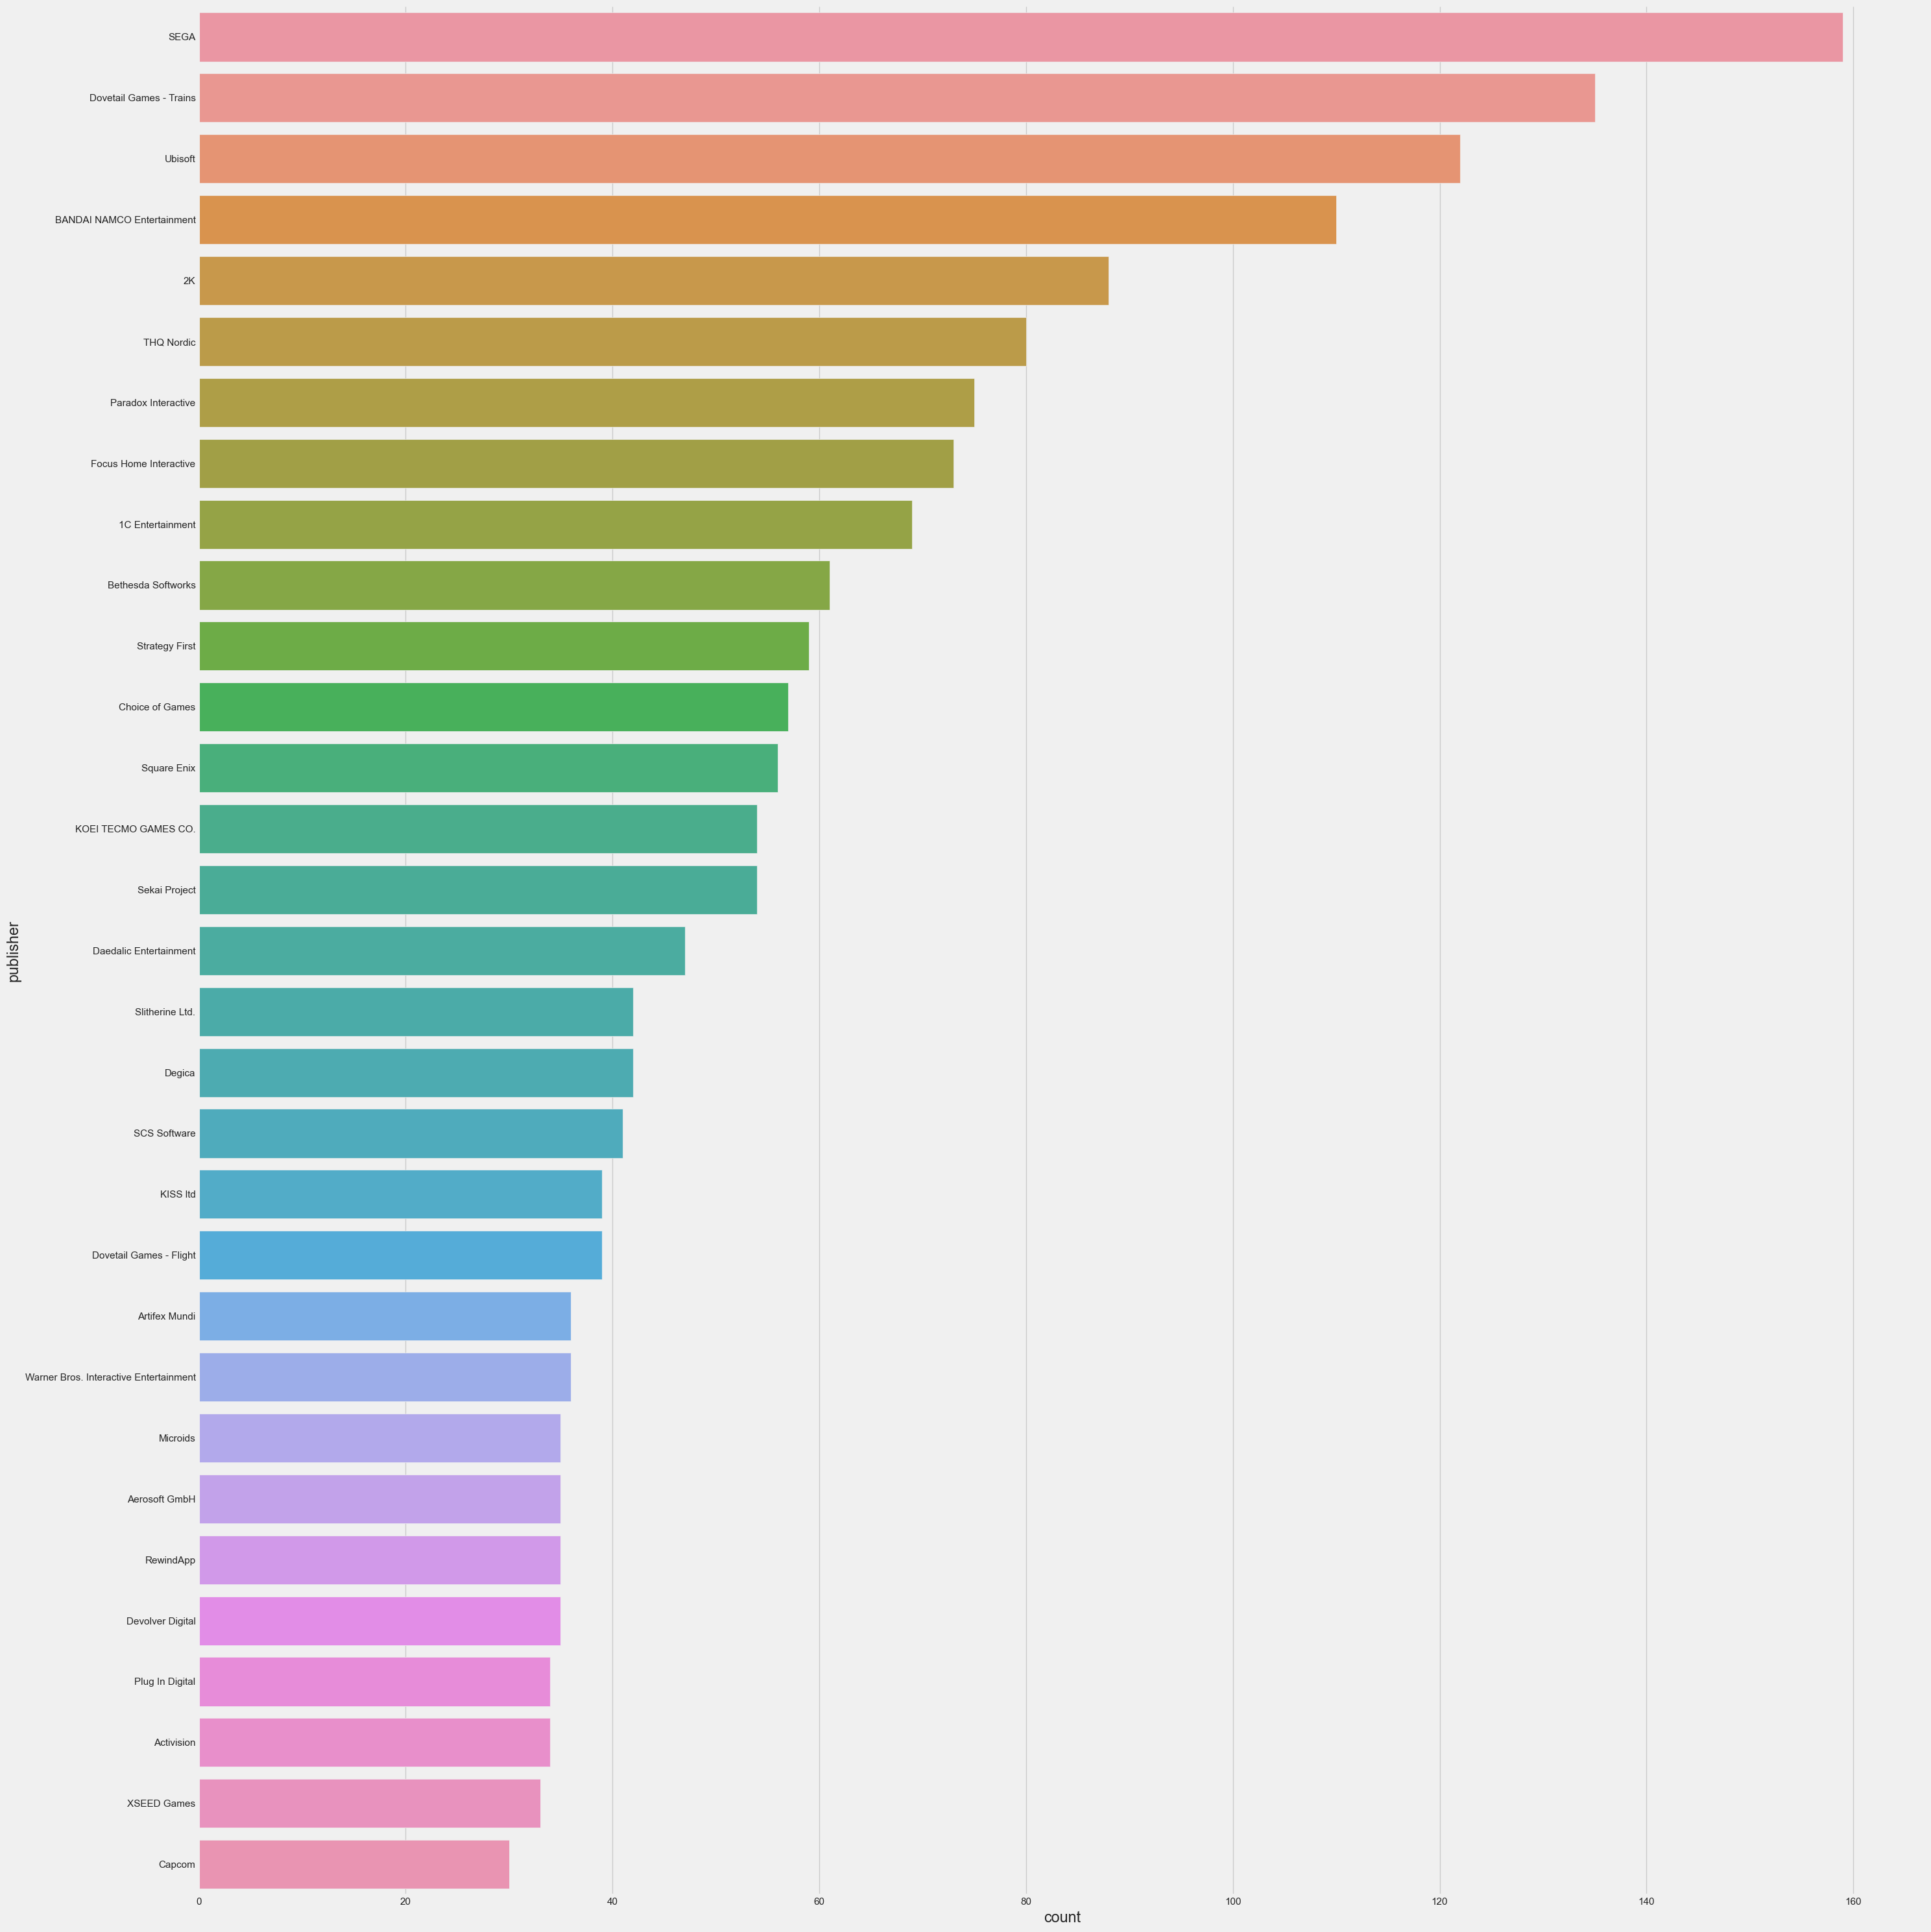

In [45]:
# Publisher

sb.catplot(y = "publisher", data = morepublisher, kind = "count", order = morepublisher['publisher'].value_counts().index, height = 30)

<AxesSubplot:xlabel='all_reviews', ylabel='publisher'>

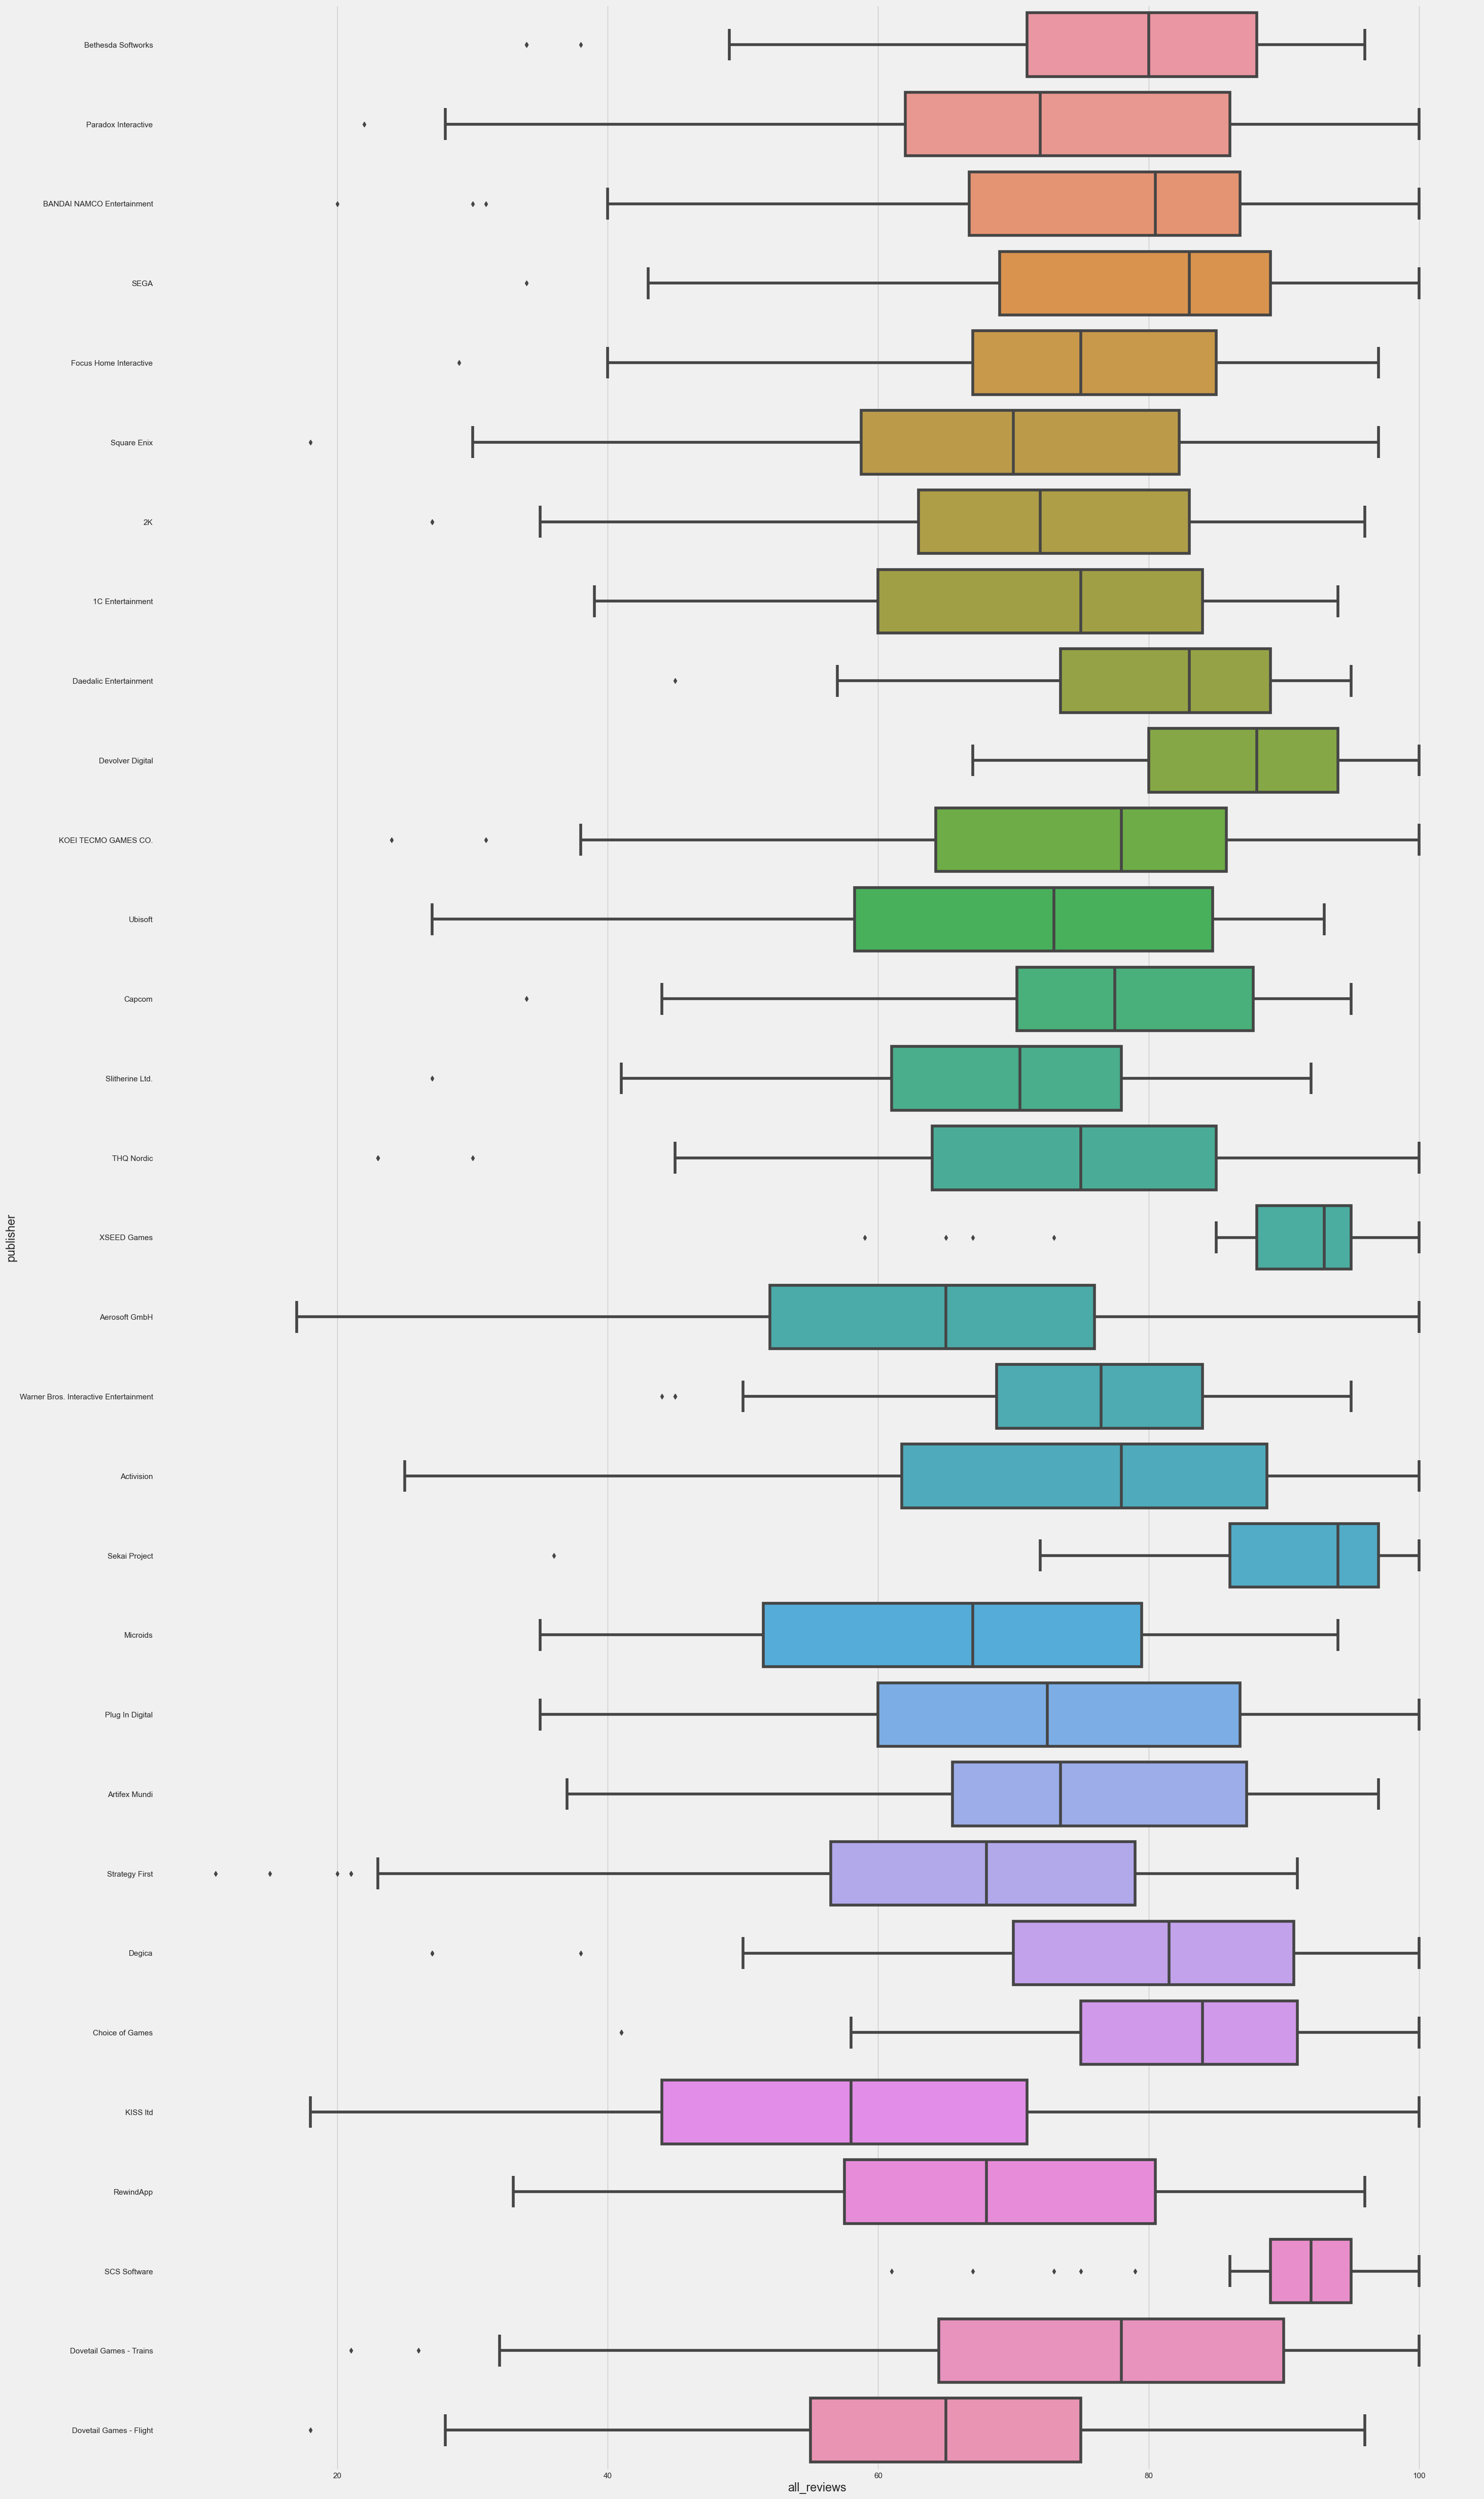

In [46]:
# Publisher vs all reviews

f = plt.figure(figsize=(30, 60))
sb.boxplot(x = "all_reviews", y = "publisher", data = morepublisher, orient = "h", width = 0.8)

In [47]:
#games['release_date'] = pd.to_datetime(games['release_date'])

In [54]:
#sb.lineplot(games['release_date'], games['all_reviews'])